# CUSTOMER CHURN
** Customer Churn which is one of the most important metrices that determine the growth of a business.
It is the percentage of the number of clients that has stayed with company and used its services. It shows hard truth about a company's customer retention. 
It is known that keeping right customers takes up less resources because you don't have to spend time and resources to find new customers.
Therefore in other words Customer Churn illuminates which type of customers are at risk and need intervention to improve the business.

# IMPORTING PYTHON PACKAGES

In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn eli5


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U pdpbox

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pdpbox

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [6]:
# IMPORTING LIBRARIES 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


# LOADING DATA AND DATA MANIPULATION

In [105]:
#LOADING DATASET

df= pd.read_csv("/Users/tejalpatel/Desktop/Bank_churn-main/bank_customer.csv") # reads the file
df.head() # returns the first n rows for the object based on position

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [48]:
# CHECKING THE DIMENSIONS OF THE DATASET
df.shape

(10000, 12)

In [49]:
# LOOKING FOR TYPES OF DATA PRESENT IN THE DATASET 
df.dtypes 

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [50]:
# data frame(data=None, index=None(row labels), columns=None, dtype=None, copy=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [51]:
df.select_dtypes(include='float')

balance  estimated_salary
0          0.00         101348.88
1      83807.86         112542.58
2     159660.80         113931.57
3          0.00          93826.63
4     125510.82          79084.10
...         ...               ...
9995       0.00          96270.64
9996   57369.61         101699.77
9997       0.00          42085.58
9998   75075.31          92888.52
9999  130142.79          38190.78

[10000 rows x 2 columns]

In [12]:
df.values #return a numpy representation of the data frame

array([[15634602, 619, 'France', ..., 1, 101348.88, 1],
       [15647311, 608, 'Spain', ..., 1, 112542.58, 0],
       [15619304, 502, 'France', ..., 0, 113931.57, 1],
       ...,
       [15584532, 709, 'France', ..., 1, 42085.58, 1],
       [15682355, 772, 'Germany', ..., 0, 92888.52, 1],
       [15628319, 792, 'France', ..., 0, 38190.78, 0]], dtype=object)

In [13]:
df.axes #representing the axes of df

[RangeIndex(start=0, stop=10000, step=1),
 Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
        'balance', 'products_number', 'credit_card', 'active_member',
        'estimated_salary', 'churn'],
       dtype='object')]

In [14]:
# no of array dimensions
df.ndim

2

In [15]:
df.size

120000

In [16]:
df.memory_usage()

Index                 128
customer_id         80000
credit_score        80000
country             80000
gender              80000
age                 80000
tenure              80000
balance             80000
products_number     80000
credit_card         80000
active_member       80000
estimated_salary    80000
churn               80000
dtype: int64

In [17]:
#index: index bool, default True
#Specifies whether to include the memory usage of the DataFrame’s index in returned Series. If index=True, the memory usage of the index is the first item in the output.
df.memory_usage(index=True)

Index                 128
customer_id         80000
credit_score        80000
country             80000
gender              80000
age                 80000
tenure              80000
balance             80000
products_number     80000
credit_card         80000
active_member       80000
estimated_salary    80000
churn               80000
dtype: int64

In [18]:
#deepbool, default False
#If True, introspect the data deeply by interrogating object dtypes for system-level memory consumption, and include it in the returned values.
df.memory_usage(deep=False)

Index                 128
customer_id         80000
credit_score        80000
country             80000
gender              80000
age                 80000
tenure              80000
balance             80000
products_number     80000
credit_card         80000
active_member       80000
estimated_salary    80000
churn               80000
dtype: int64

In [19]:
#Use a Categorical for efficient storage of an object-dtype column with many repeated values.
df['customer_id'].astype('category').memory_usage(deep=True)

364360

In [20]:
df['country'].astype('string').memory_usage(deep=True)

630160

In [21]:
df.empty

False

In [22]:
#This is index for Series, columns for DataFrame.
df.keys()

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [23]:
df.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [24]:
# TO CHECK IF ANY DATA IS MISSING
df.isnull()

customer_id  credit_score  country  gender    age  tenure  balance  \
0           False         False    False   False  False   False    False   
1           False         False    False   False  False   False    False   
2           False         False    False   False  False   False    False   
3           False         False    False   False  False   False    False   
4           False         False    False   False  False   False    False   
...           ...           ...      ...     ...    ...     ...      ...   
9995        False         False    False   False  False   False    False   
9996        False         False    False   False  False   False    False   
9997        False         False    False   False  False   False    False   
9998        False         False    False   False  False   False    False   
9999        False         False    False   False  False   False    False   

      products_number  credit_card  active_member  estimated_salary  churn  
0               False        False          False             False  False  
1               False        False          False             False  False  
2               False        False          False             False  False  
3               False        False          False             False  False  
4               False        False          False             False  False  
...               ...          ...            ...               ...    ...  
9995            False        False          False             False  False  
9996            False        False          False             False  False  
9997            False        False          False             False  False  
9998            False        False          False             False  False  
9999            False        False          False             False  False  

[10000 rows x 12 columns]

In [25]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [26]:
#Return reshaped DataFrame organized by given index / column values.
df.pivot

<bound method DataFrame.pivot of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  est

In [27]:
#Rearrange index levels using input order. May not drop or duplicate levels.
df.reorder_levels

<bound method DataFrame.reorder_levels of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_me

In [28]:
#Sort by the values along either axis.
df.sort_values

<bound method DataFrame.sort_values of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_membe

# DATA VISUALIZATION

In [29]:
#Separating churn and non churn customers
churn     = df[df["churn"] == 1]
not_churn = df[df["churn"] == 0]

In [30]:
# Checking for unique value in the data attributes
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [31]:
# Describe the all statistical properties of the training dataset
df[df.columns[:12]].describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [32]:
# Median
numeric_columns = df[df.columns[:12]].select_dtypes(include=['number'])
median_values = numeric_columns.median()

#df[df.columns[:12]].median()

In [33]:
# Percentage per category for the target column.
percentage_labels = df['churn'].value_counts(normalize = True) * 100
percentage_labels

churn
0    79.63
1    20.37
Name: proportion, dtype: float64

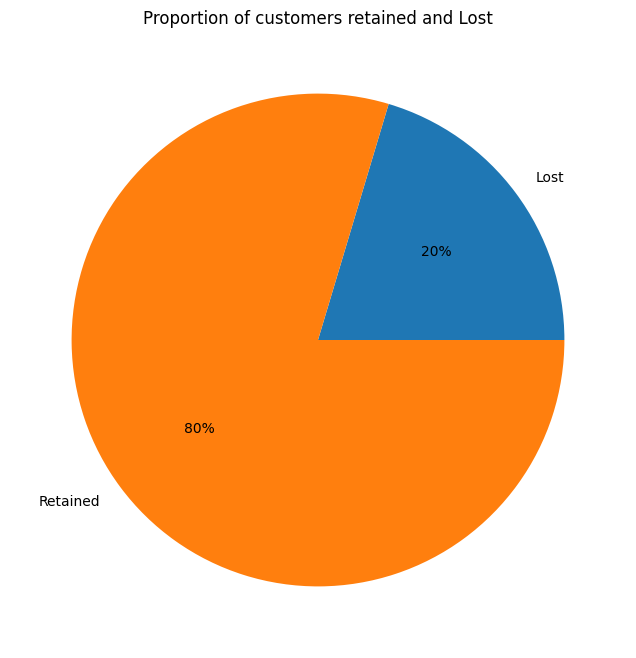

In [34]:
labels = 'Lost', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
fig = plt.figure(figsize = (8, 8))
plt.pie(sizes,labels=labels, autopct='%.0f%%')
plt.title('Proportion of customers retained and Lost')
plt.show()

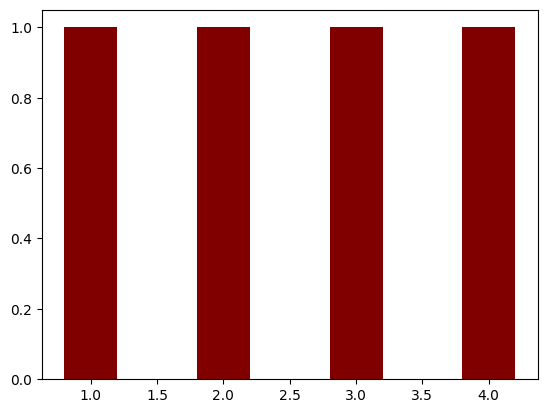

In [35]:
#fig = plt.figure(figsize = (2, 2))
 
# creating the bar plot

plt.bar(df['products_number'], df['credit_card'], color ='maroon',
        width = 0.4)
plt.show()

In [36]:
customer_score = df[["customer_id", "credit_score"]]
customer_score.head()

customer_id  credit_score
0     15634602           619
1     15647311           608
2     15619304           502
3     15701354           699
4     15737888           850

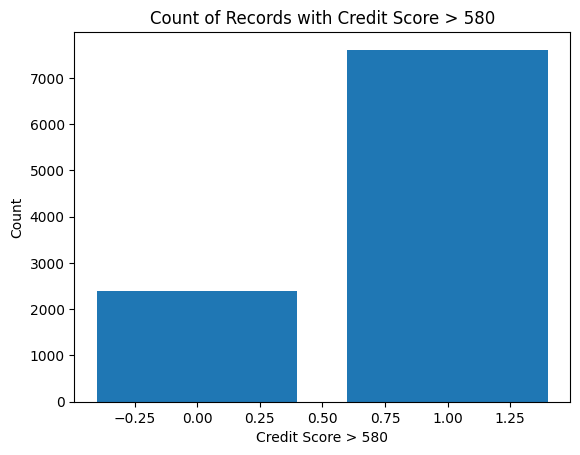

In [37]:
# A score below 580 is considered "bad credit. Therefore we check for customers having credit score above 580
#df["credit_score"] > 580

# Create a boolean mask based on the condition
mask = df["credit_score"] > 580

# Count the occurrences of True and False in the mask
counts = mask.value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel("Credit Score > 580")
plt.ylabel("Count")
plt.title("Count of Records with Credit Score > 580")

# Show the plot
plt.show()

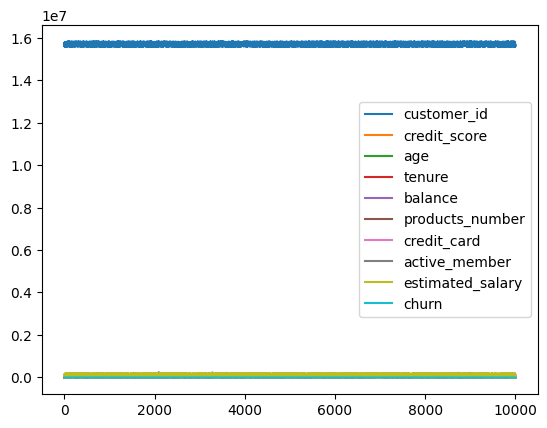

In [38]:
df.plot()
plt.show()

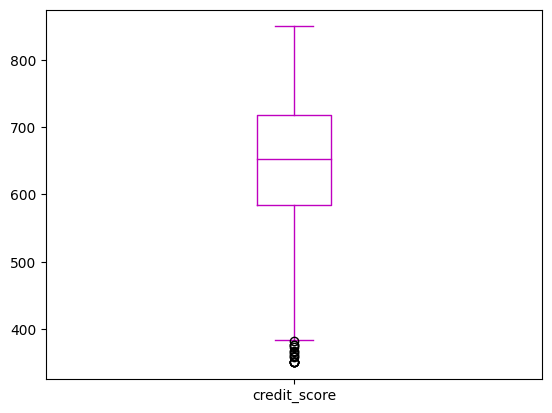

In [39]:
df.plot.box(x='country', y='credit_score', color='m')
plt.show()

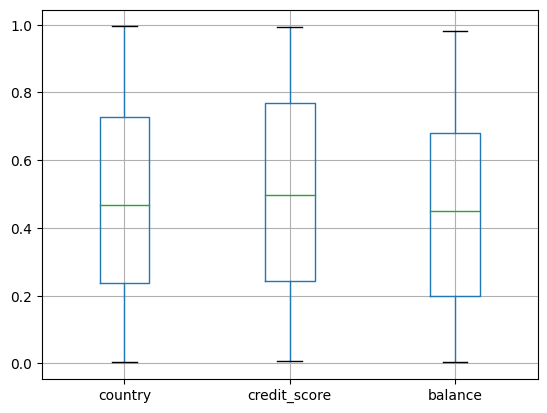

In [43]:
np.random.seed(40)
#NUMPY.RANDOM.SEED PROVIDES AN INPUT TO THE PSEUDO-RANDOM NUMBER GENERATOR
df = pd.DataFrame(np.random.rand(140, 4), columns=['country', 'credit_score', 'balance', 'products_number'])
boxplot = df.boxplot(column=['country', 'credit_score', 'balance'])  

In [44]:
#With DataFrame.sort_values(), the rows in the table are sorted according to the defined column(s). The index will follow the row order.
df.sort_values(by=['credit_score'],ascending= True).head(5)

country  credit_score   balance  products_number
33   0.852577      0.005854  0.082812         0.516861
132  0.006671      0.008752  0.163368         0.090102
56   0.994864      0.009419  0.032301         0.648698
108  0.756620      0.018057  0.089027         0.579511
118  0.241439      0.026949  0.187053         0.004083

Text(48.59782725694443, 0.5, 'estimated_salary')

<Figure size 2000x2000 with 0 Axes>

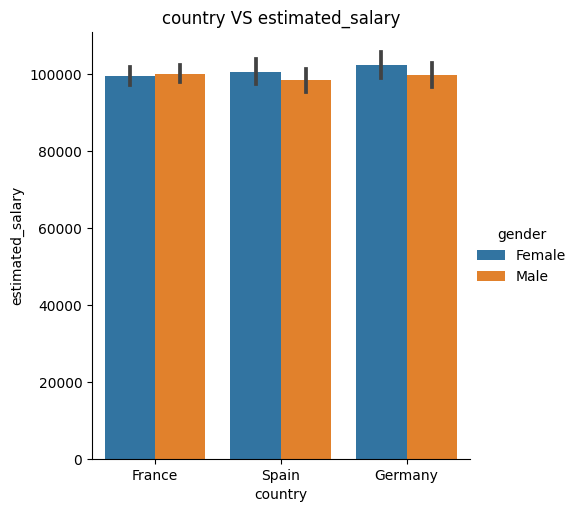

In [52]:
plt.figure(figsize=(20,20))
sns.catplot(x="country", y="estimated_salary", hue="gender", kind="bar", data=df)
plt.title("country VS estimated_salary")
plt.xlabel("country")
plt.ylabel("estimated_salary")

Text(40.567485677083326, 0.5, 'estimated_salary')

<Figure size 2000x2000 with 0 Axes>

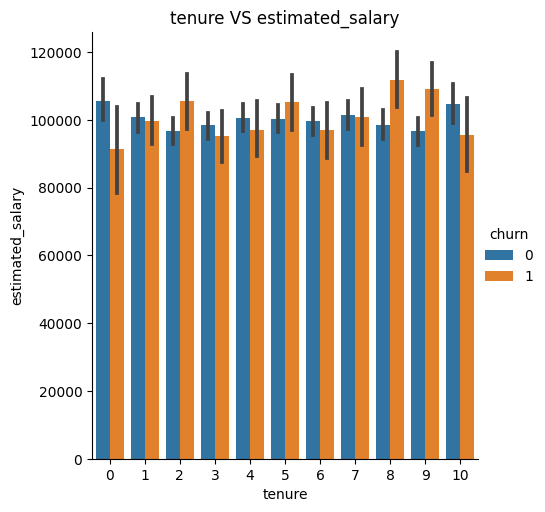

In [53]:
plt.figure(figsize=(20,20))
sns.catplot(x="tenure", y="estimated_salary", hue="churn", kind="bar", data=df)
plt.title("tenure VS estimated_salary")
plt.xlabel("tenure")
plt.ylabel("estimated_salary")

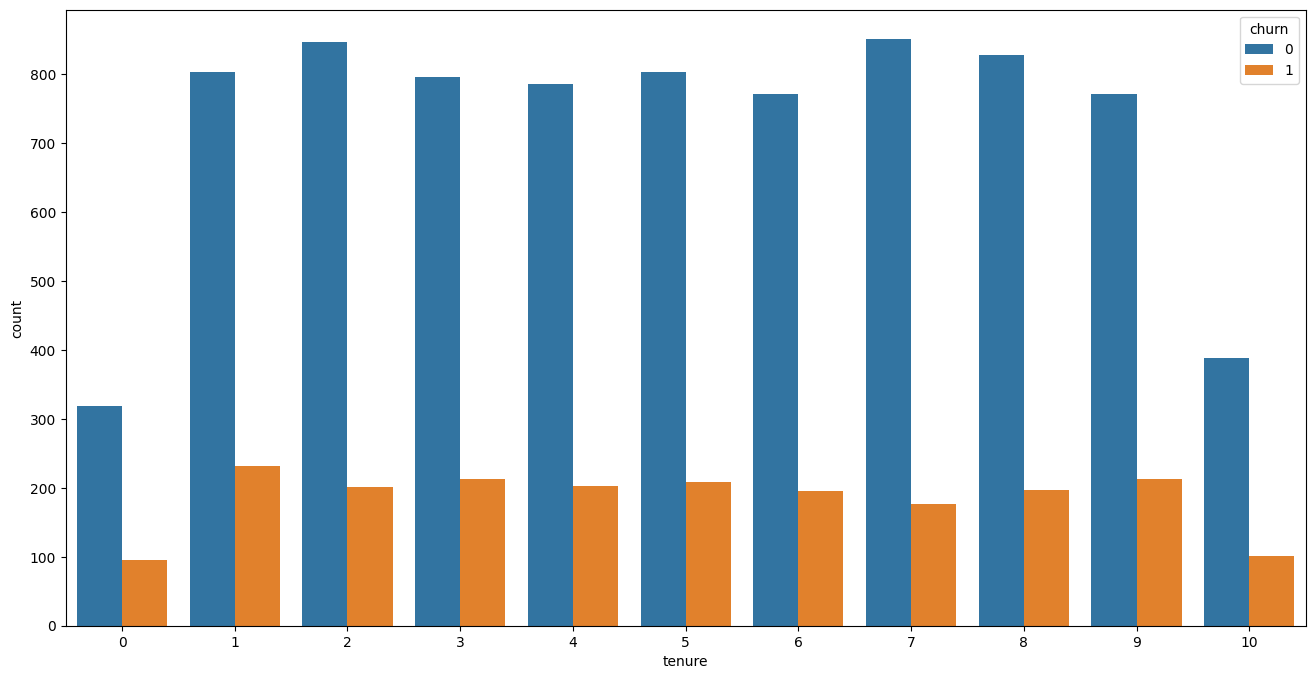

In [54]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="churn", data=df)
plt.show()

Text(51.24225998263887, 0.5, 'estimated_salary')

<Figure size 20000x20000 with 0 Axes>

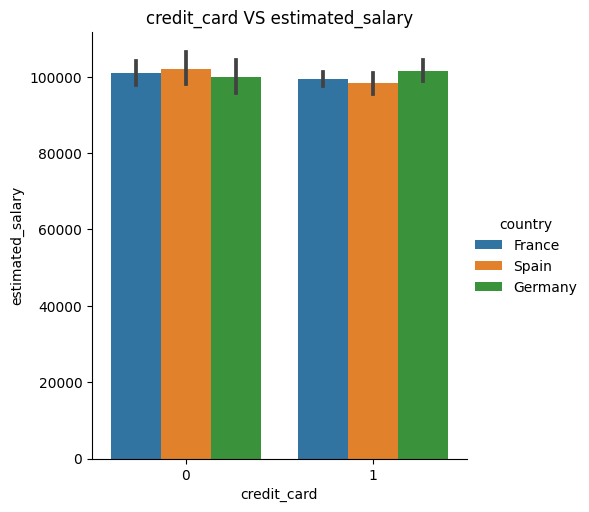

In [55]:
plt.figure(figsize=(200,200))
sns.catplot(x="credit_card", y="estimated_salary", hue="country", kind="bar", data=df)
plt.title("credit_card VS estimated_salary")
plt.xlabel("credit_card")
plt.ylabel("estimated_salary")

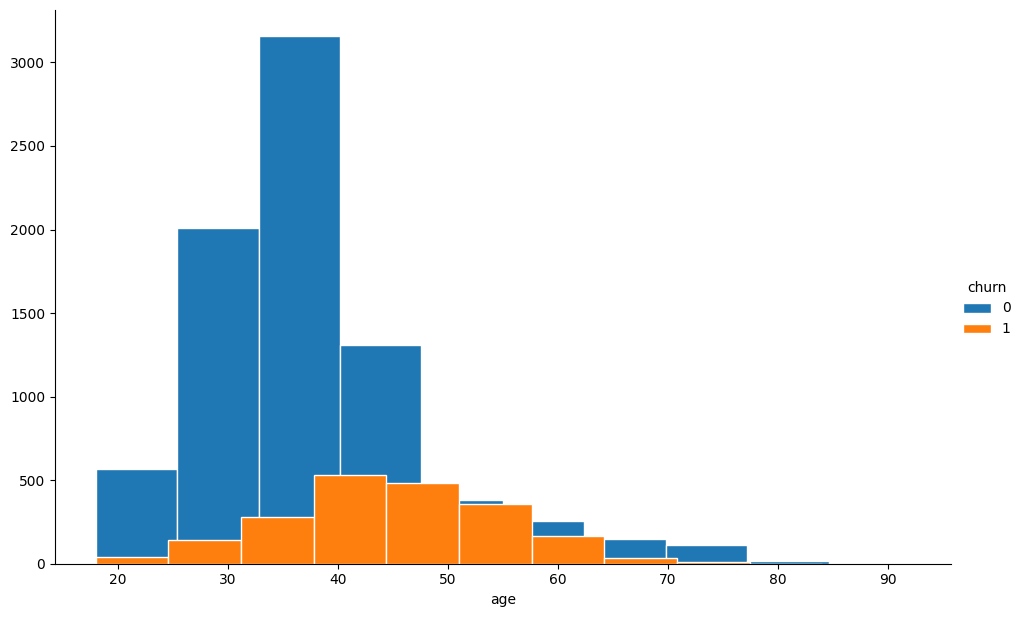

In [56]:
from matplotlib import rcParams

# figure size in inches
#rcParams['figure.figsize'] = 11.7,8.27

g = sns.FacetGrid(df,hue = 'churn', height = 6.27, aspect=9.7/6.27)
(g.map(plt.hist,'age',edgecolor="w").add_legend())


<Axes: xlabel='churn', ylabel='estimated_salary'>

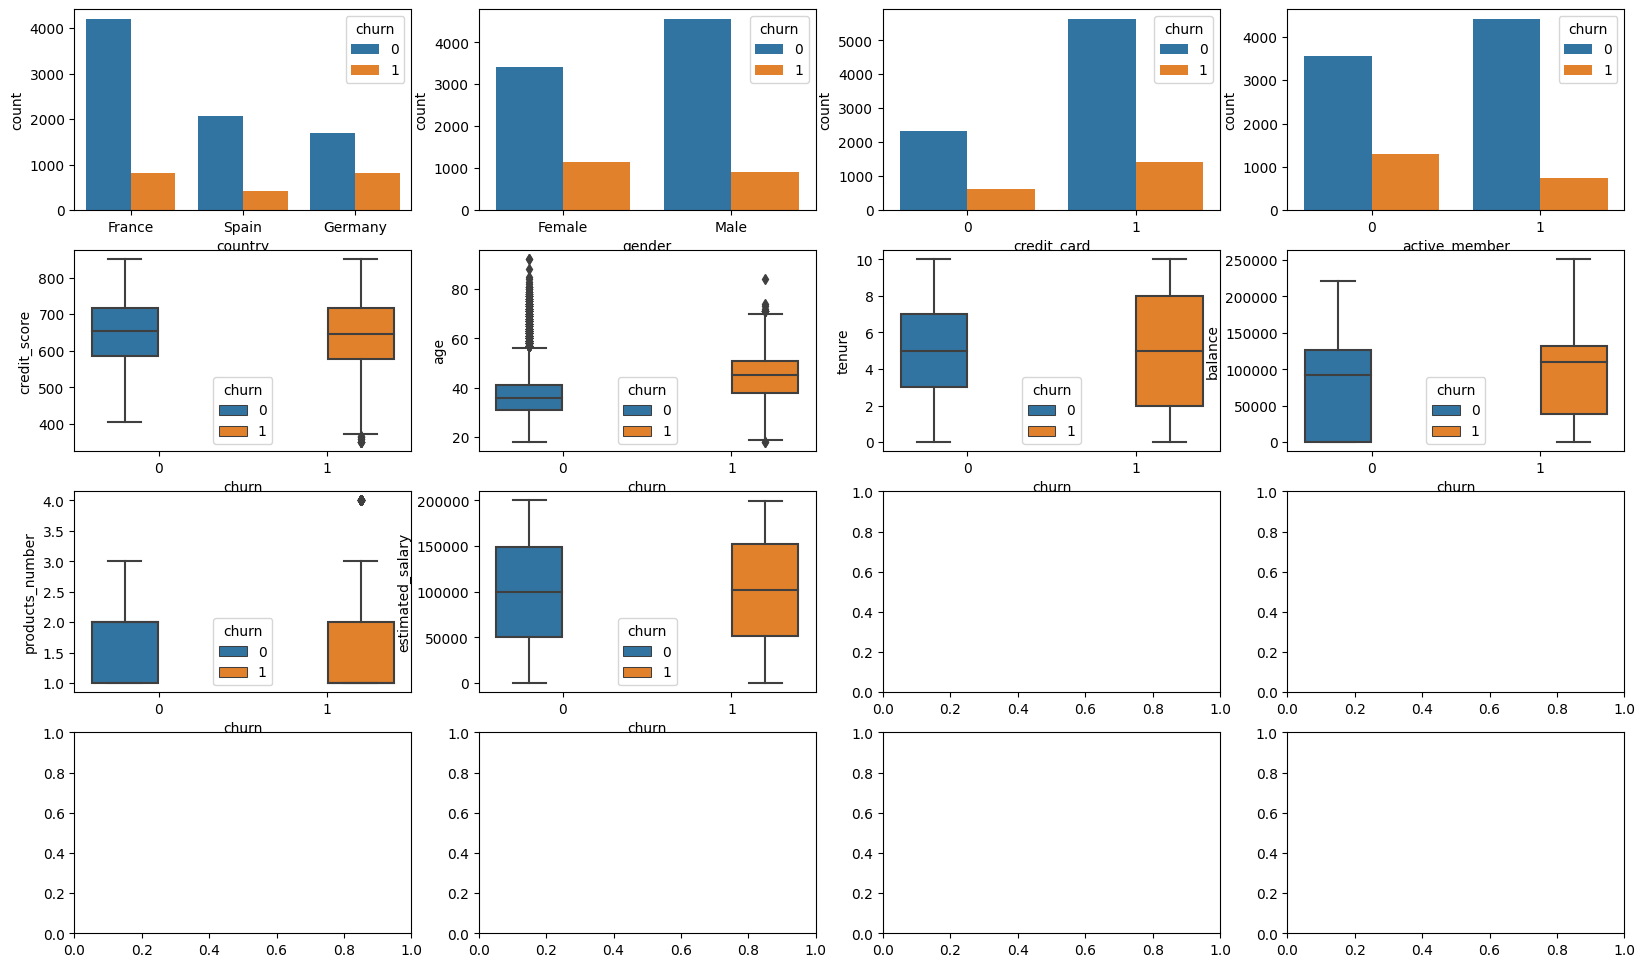

In [57]:
#Data Visualization of the dataset
fig, axarr = plt.subplots(4, 4, figsize=(20, 12))
sns.countplot(x='country', hue = 'churn',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'churn',data = df, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn',data = df, ax=axarr[0][2])
sns.countplot(x='active_member', hue = 'churn',data = df, ax=axarr[0][3])
sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = df, ax=axarr[1][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = df , ax=axarr[1][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = df, ax=axarr[1][2])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = df, ax=axarr[1][3])
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = df, ax=axarr[2][0])
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = df, ax=axarr[2][1])



# ANALYSIS OF THE PLOT
 
1 Plot(0,0): France has the large population but the churn value is inversely proportional to the population
             which means that the bank is losing customers
  
2 Plot(0,1): Female customers have large ratio of being an customer than male customers.

3 Plot(0,2): Plot3: Ironically maximum number of people who are churned are those whose have credit cards.

4 Plot(0,3): Inactive members are more who are churned which means bank needs to implement different strategies to 
             convert inactive members which would give positive impact on the customer churn.
             
5 Plot(1,0): no particular difference credit_score vs country.

6 Plot(1,1): Older customers are more active compared to younger customers.

7 Plot(1,2): Clients are on extreme sides i.e. either for long time or for less time with the bank.

8 Plot(1,3): Bank is losing balance which can hit the overall capital of the bank.

9 Plot(2,0): No particular difference.

10 Plot(2,1): No particular difference.

# INTRODUCTION TO CORRELATION
Correlation is the statistical measure which helps Data Analyst to express the strength of the relationship between any two variables.
There are 2 types of correlation
1) Positive Correlation: It occurs when two variables are moving in the same direction which means they are directly proportional

2) Negative Correlation: It occurs when two variables are moving in the opposite direction which means they are inversely proportional;

NOTE: Correlation not neccessarily imply causation because there are many other factors that come into play.

# HOW TO MEASURE CORRELATION
There are two methos:

1) Correlation coefficient / Pearson correlation coefficient:

   a It measures linear relationship between the variables.
   
   b Its range is between -1 to 1.
    
    
2) Spearman correlation coefficient:

   a It measure the strength and direction of the relationship between two variables.
   
   b Spearman correlation coefficient is often used when one or both of the variables are not normally distributed.
   
   c Its range is between -1 to 1.
   
   d It is used to measure both linear and non-linear relationship between the variables. 

# VALUES OF CORRELATION

1) If value is 1 : it shows positive correlation between the two variables.

2) If value is -1: it shows negative correlation between the two variables.

3) If value is 0 : it shows no correlation between the two variables.

# WHY TO UNDERSTAND CORRELATION CONCEPTS
1) It is used in machine learning to find the multicollinearity which is when two or more predictor variables are highly correlated with each other.

2) Multicollinearity can impact the accuracy of the predictive models which is why it is important to identify and remove predictors that are highly multicollinear.

TO IDENTIFY MULTICOLLINEARITY: we calculate Variance Inflation factor (VIF), which measures the degree of correlation between predictor variables.

Multicollinearity can be addressed either removing one of the correlated variables or by using regularization techniques. Regularization techniques penalize model complexity, which helps to prevent overfitting.

In [65]:
#Correlationship between quantities array 
df[df.columns].corr()

customer_id  credit_score       age    tenure   balance  \
customer_id          1.000000      0.005308  0.009497 -0.014883 -0.012419   
credit_score         0.005308      1.000000 -0.003965  0.000842  0.006268   
age                  0.009497     -0.003965  1.000000 -0.009997  0.028308   
tenure              -0.014883      0.000842 -0.009997  1.000000 -0.012254   
balance             -0.012419      0.006268  0.028308 -0.012254  1.000000   
products_number      0.016972      0.012238 -0.030680  0.013444 -0.304180   
credit_card         -0.014025     -0.005458 -0.011721  0.022583 -0.014858   
active_member        0.001665      0.025651  0.085472 -0.028362 -0.010084   
estimated_salary     0.015271     -0.001384 -0.007201  0.007784  0.012797   
churn               -0.006248     -0.027094  0.285323 -0.014001  0.118533   
country_0           -0.004049     -0.008928 -0.039208 -0.002848 -0.231329   
country_1           -0.003097      0.005538  0.046897 -0.000567  0.401110   
country_2            0.007800      0.004780 -0.001685  0.003868 -0.134892   
gender_0             0.002641      0.002857  0.027544 -0.014733 -0.012087   
gender_1            -0.002641     -0.002857 -0.027544  0.014733  0.012087   

                  products_number  credit_card  active_member  \
customer_id              0.016972    -0.014025       0.001665   
credit_score             0.012238    -0.005458       0.025651   
age                     -0.030680    -0.011721       0.085472   
tenure                   0.013444     0.022583      -0.028362   
balance                 -0.304180    -0.014858      -0.010084   
products_number          1.000000     0.003183       0.009612   
credit_card              0.003183     1.000000      -0.011866   
active_member            0.009612    -0.011866       1.000000   
estimated_salary         0.014204    -0.009933      -0.011421   
churn                   -0.047820    -0.007138      -0.156128   
country_0                0.001230     0.002467       0.003317   
country_1               -0.010419     0.010577      -0.020486   
country_2                0.009039    -0.013480       0.016732   
gender_0                 0.021859    -0.005766      -0.022544   
gender_1                -0.021859     0.005766       0.022544   

                  estimated_salary     churn  country_0  country_1  country_2  \
customer_id               0.015271 -0.006248  -0.004049  -0.003097   0.007800   
credit_score             -0.001384 -0.027094  -0.008928   0.005538   0.004780   
age                      -0.007201  0.285323  -0.039208   0.046897  -0.001685   
tenure                    0.007784 -0.014001  -0.002848  -0.000567   0.003868   
balance                   0.012797  0.118533  -0.231329   0.401110  -0.134892   
products_number           0.014204 -0.047820   0.001230  -0.010419   0.009039   
credit_card              -0.009933 -0.007138   0.002467   0.010577  -0.013480   
active_member            -0.011421 -0.156128   0.003317  -0.020486   0.016732   
estimated_salary          1.000000  0.012097  -0.003332   0.010297  -0.006482   
churn                     0.012097  1.000000  -0.104955   0.173488  -0.052667   
country_0                -0.003332 -0.104955   1.000000  -0.580359  -0.575418   
country_1                 0.010297  0.173488  -0.580359   1.000000  -0.332084   
country_2                -0.006482 -0.052667  -0.575418  -0.332084   1.000000   
gender_0                  0.008112  0.106512  -0.006772   0.024628  -0.016889   
gender_1                 -0.008112 -0.106512   0.006772  -0.024628   0.016889   

                  gender_0  gender_1  
customer_id       0.002641 -0.002641  
credit_score      0.002857 -0.002857  
age               0.027544 -0.027544  
tenure           -0.014733  0.014733  
balance          -0.012087  0.012087  
products_number   0.021859 -0.021859  
credit_card      -0.005766  0.005766  
active_member    -0.022544  0.022544  
estimated_salary  0.008112 -0.008112  
churn             0.106512 -0.106512  
country_0        -

<Axes: >

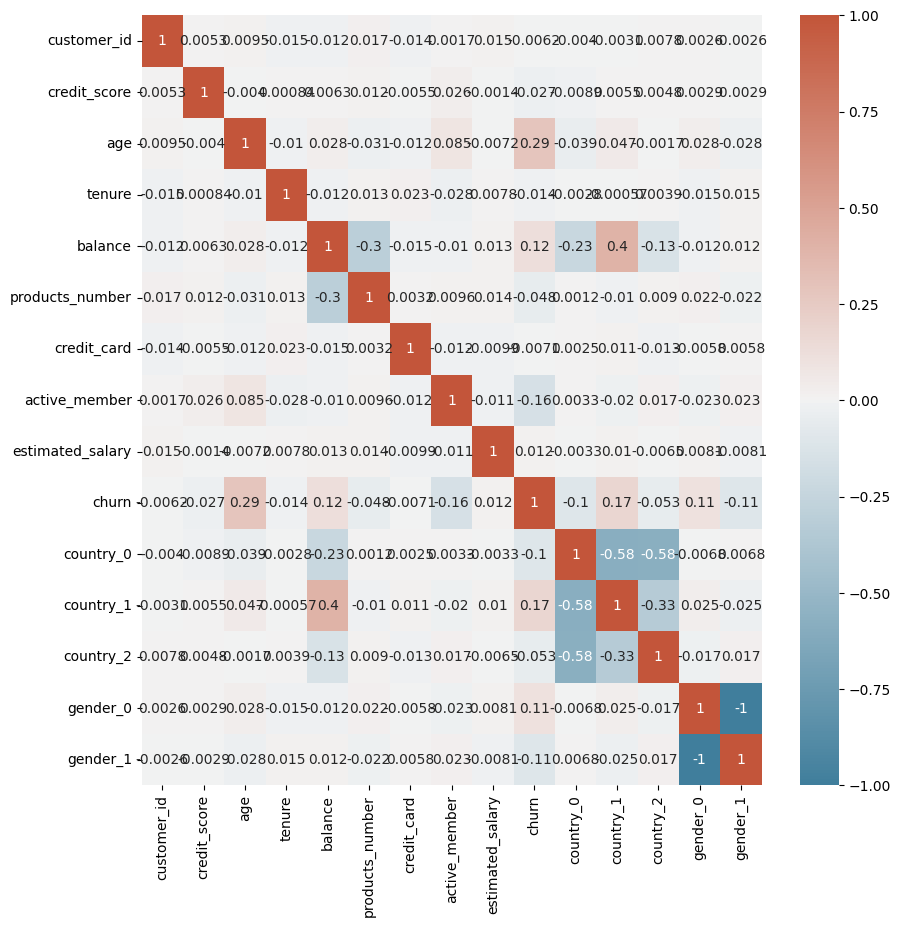

In [67]:
#Correlationship between quantities heatmap


# Get the correlation matrix of the training dataset
corr=df[df.columns].corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

# Analysing Heatmap:
1) A Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.

2) Variables such as balance & customer_id show negative correlation.

3) There are several variables that have no correlation and whose correlation value is near 0.

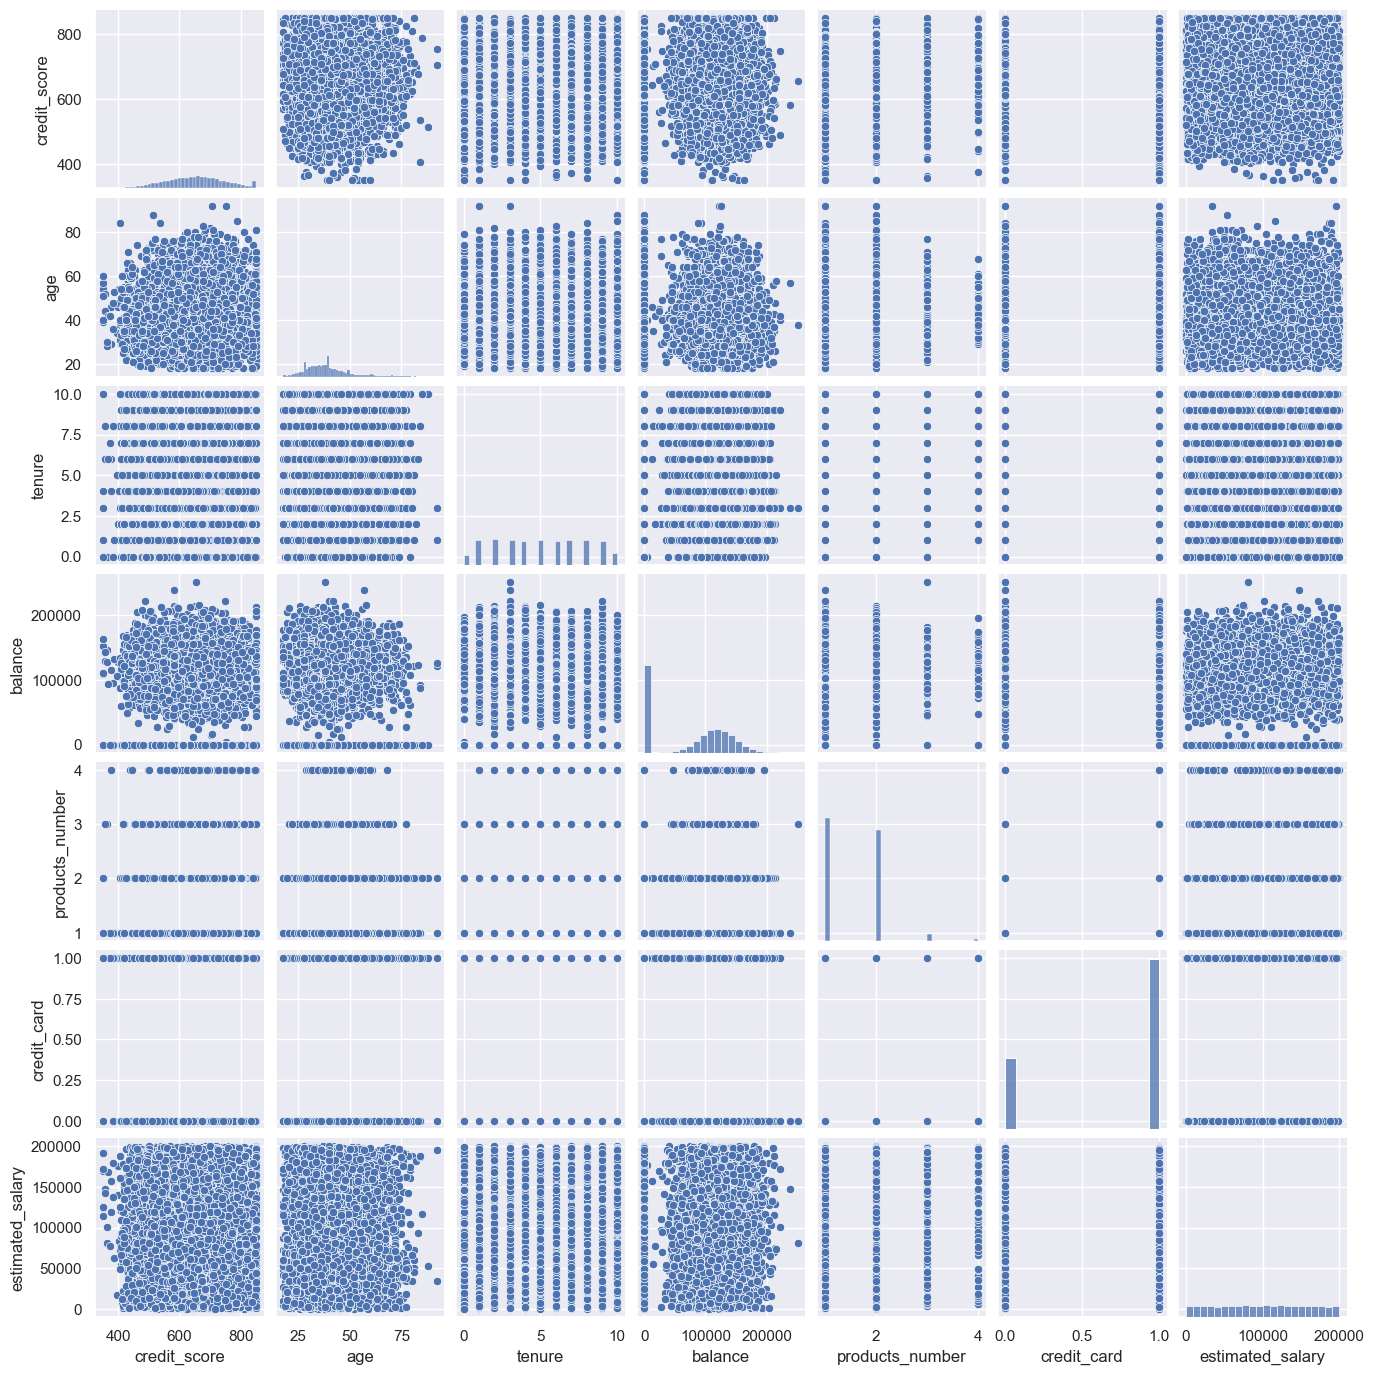

In [68]:
sns.set()
cols_pr = ['credit_score', 'age', 'tenure', 'balance', 'products_number','credit_card', 'estimated_salary']
sns.pairplot(df[cols_pr], height = 2.0)
plt.show()

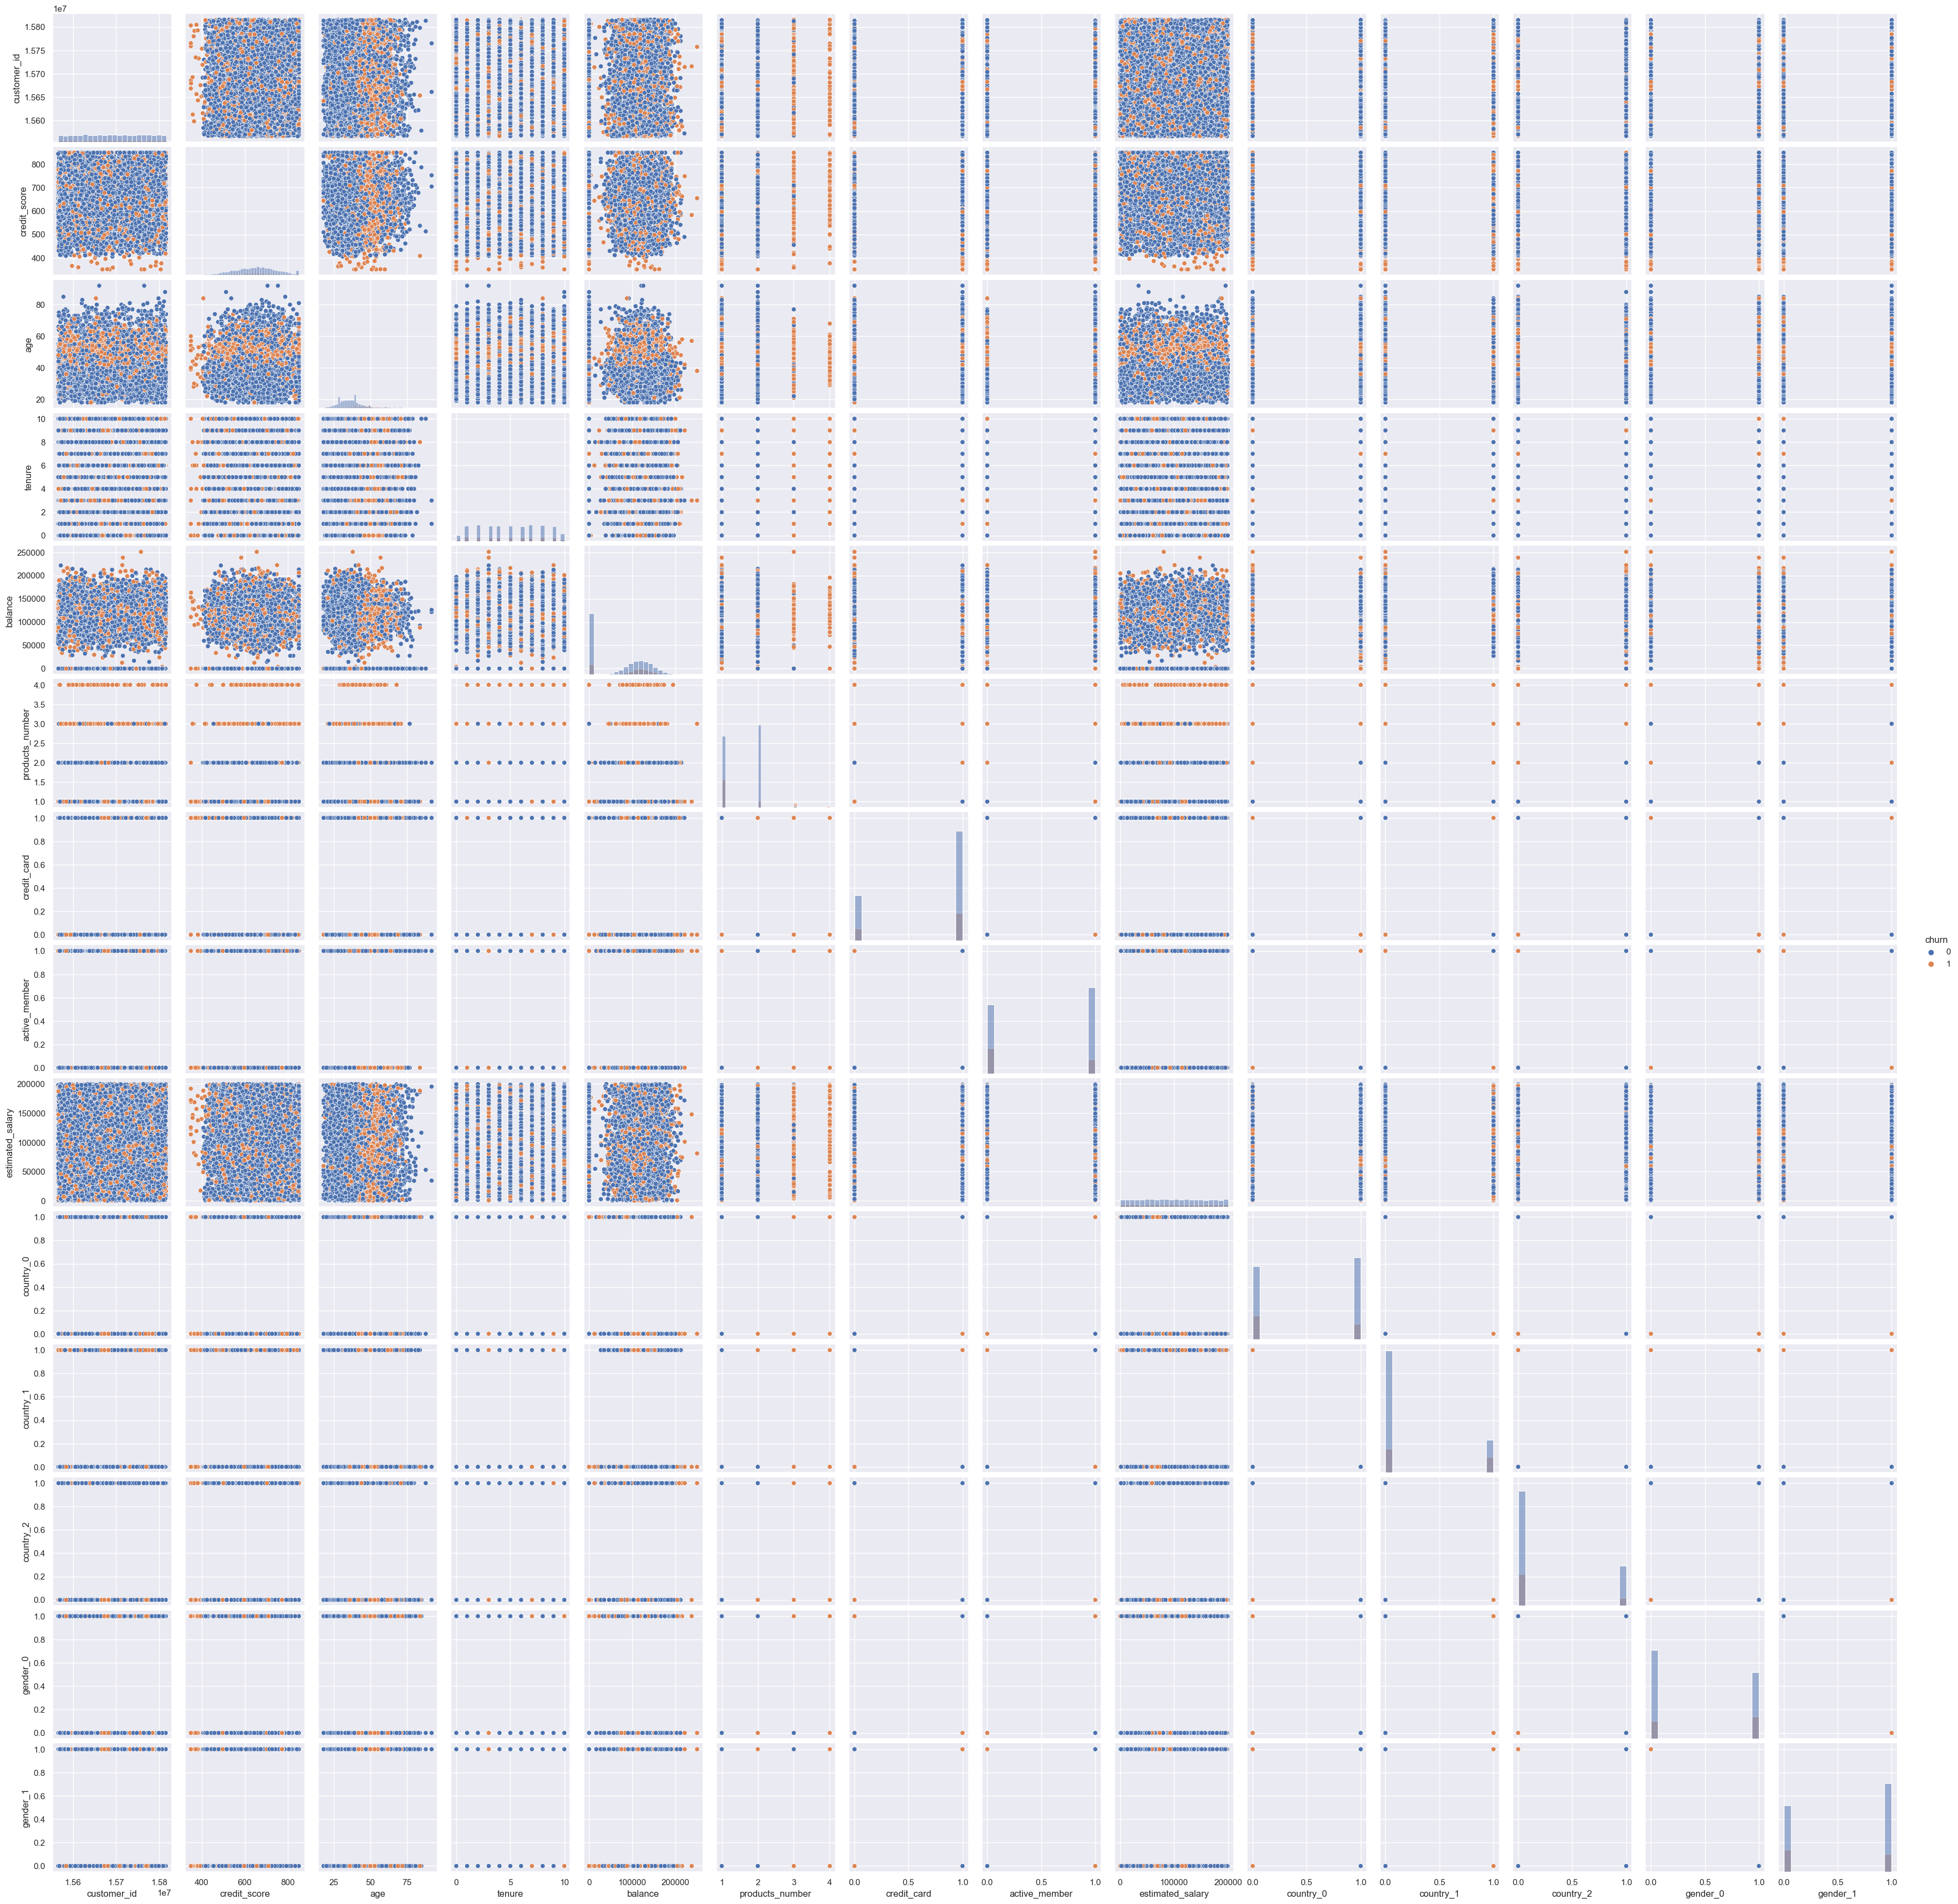

In [69]:
sns.pairplot(df, hue="churn", diag_kind="hist")

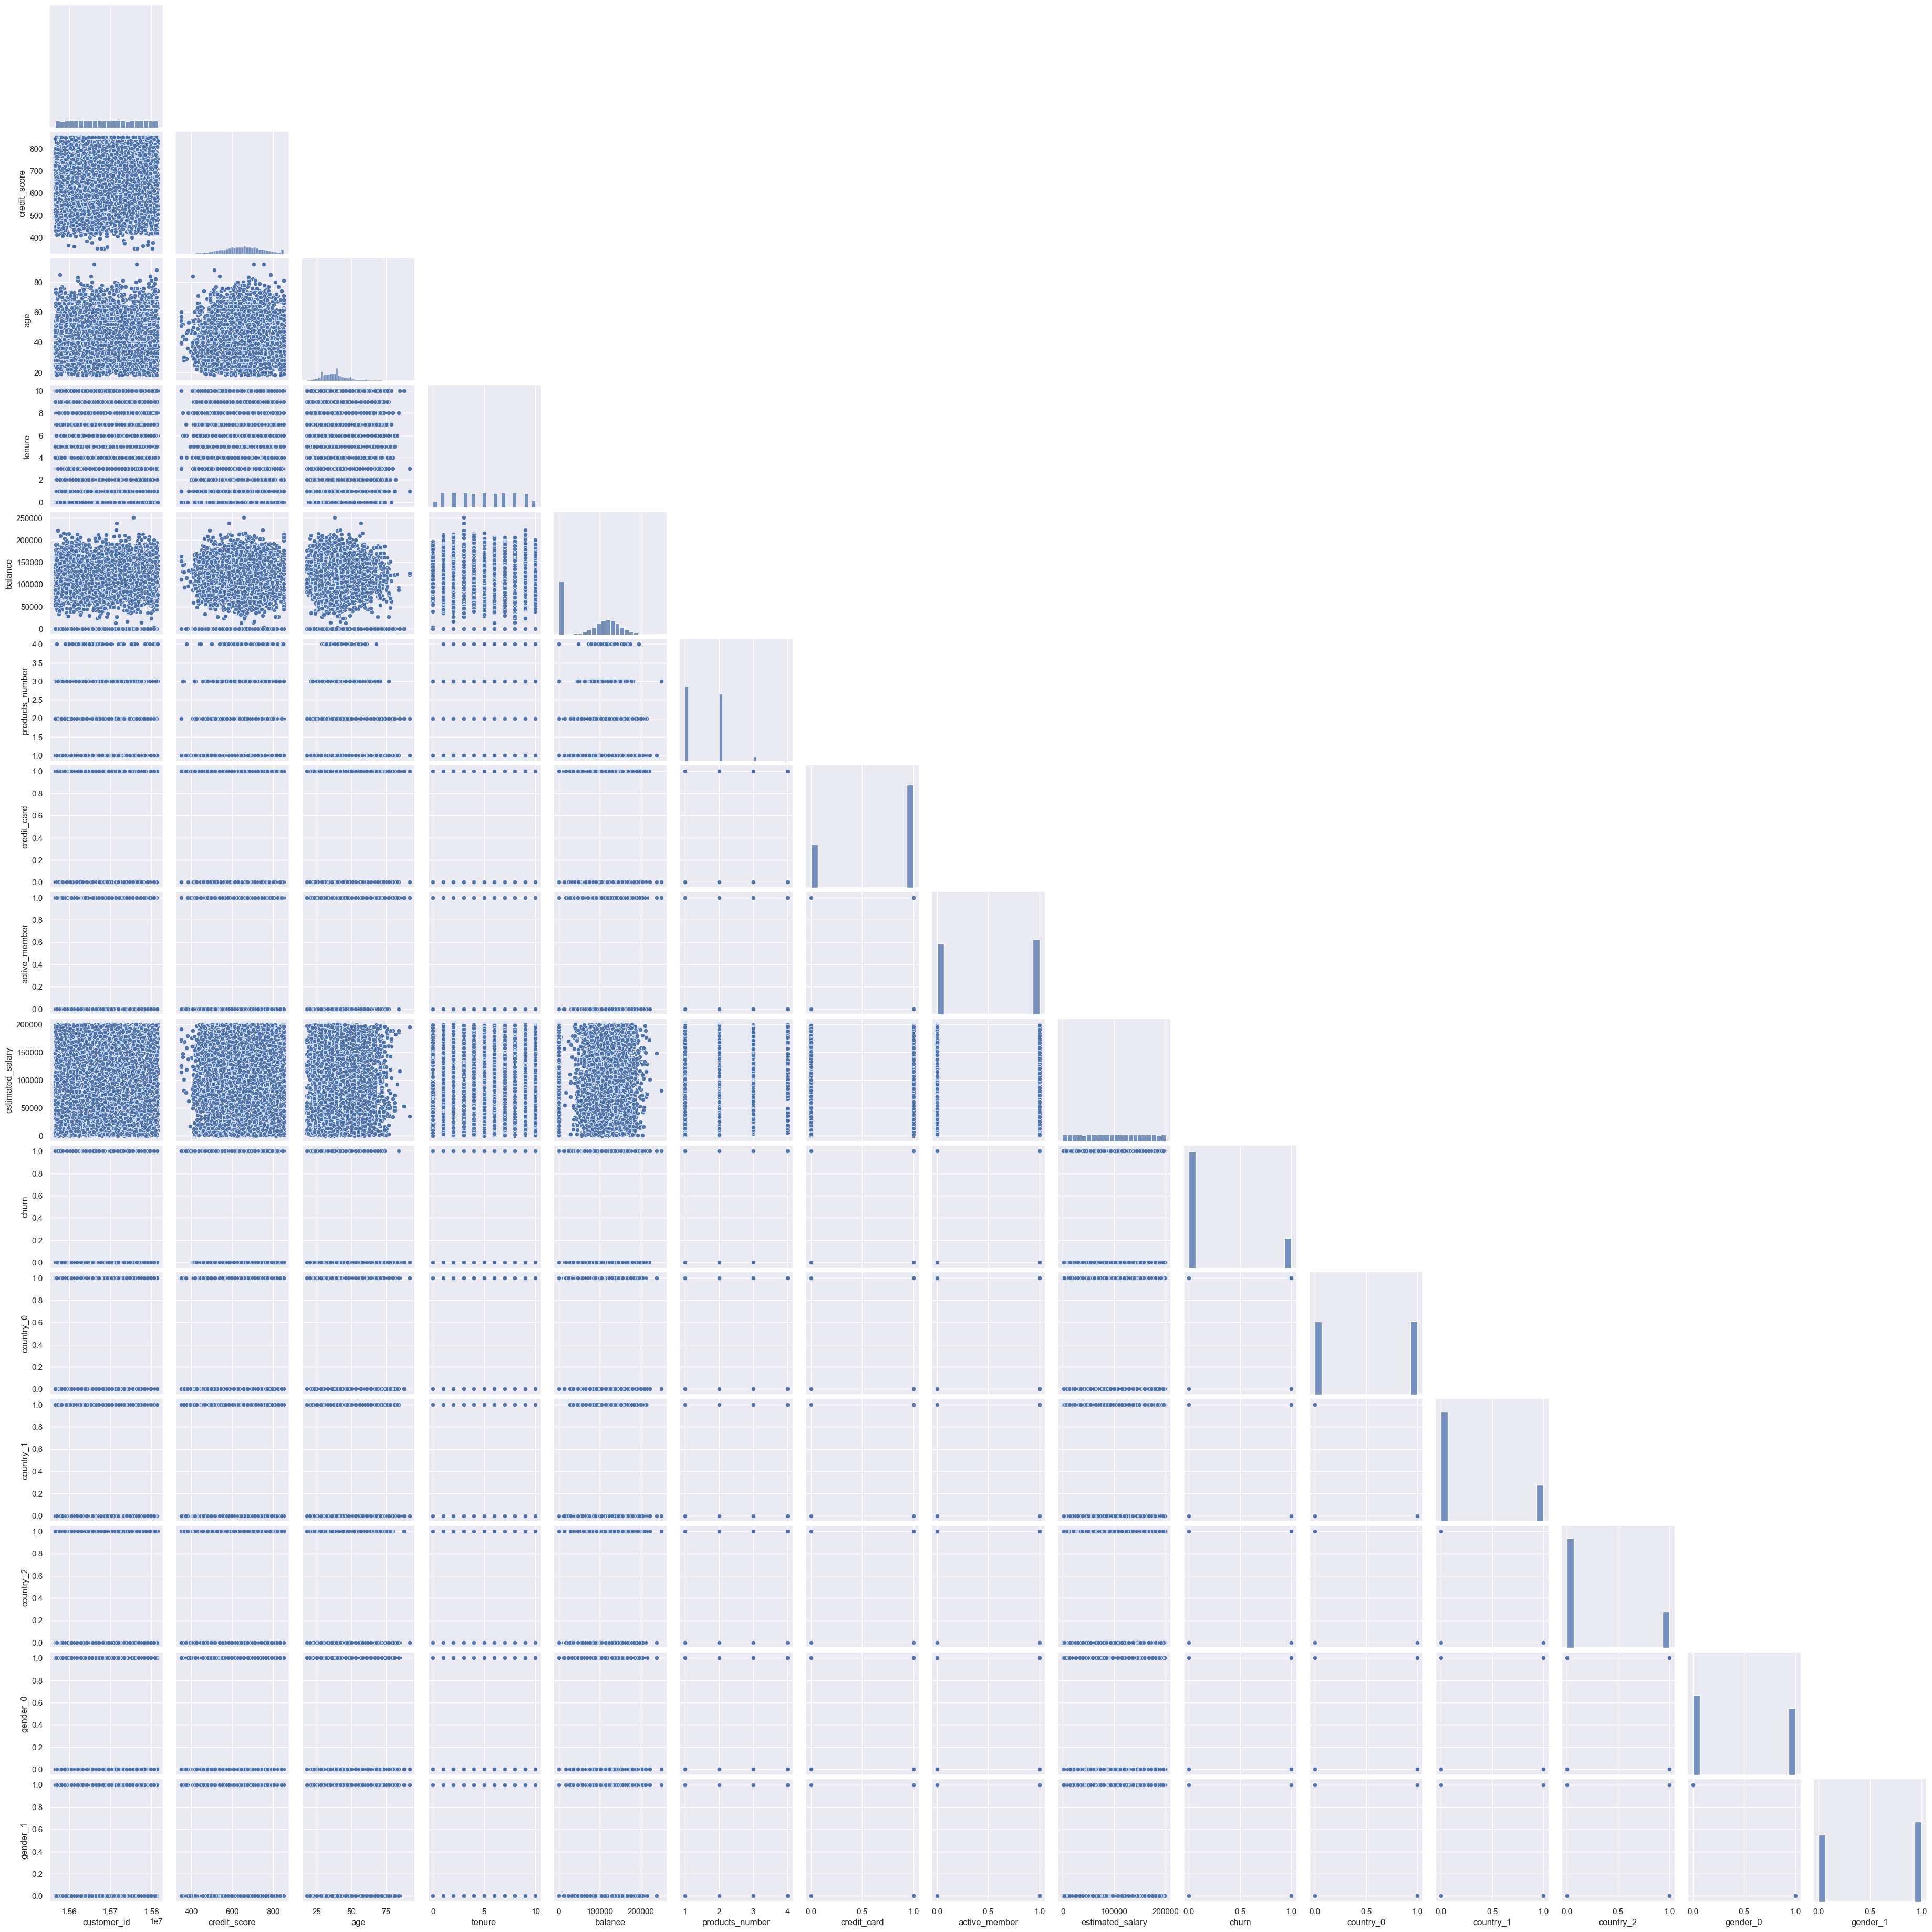

In [70]:
sns.pairplot(df, corner=True)

# INSPECTING FOR OUTLIERS

 Outlier for datacolumn credit_score using statistical process.
 
 
 
 
 
 
 
 Detecting outliers for datacolumn credit_score.

In [71]:
def outlier_treatment(credit_score):
 sorted(credit_score)
 Q1,Q3 = np.percentile(credit_score , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 print(IQR,lower_range,upper_range)

In [72]:
#Alternate syntax for outliers
Q1=df["credit_score"].quantile(0.25)
Q3=df["credit_score"].quantile(0.75)
IQR= Q3-Q1
Lower_range = Q1-1.5*IQR
Upper_range = Q3+1.5*IQR
print(IQR, Lower_range, Upper_range)

134.0 383.0 919.0


<Axes: xlabel='credit_score'>

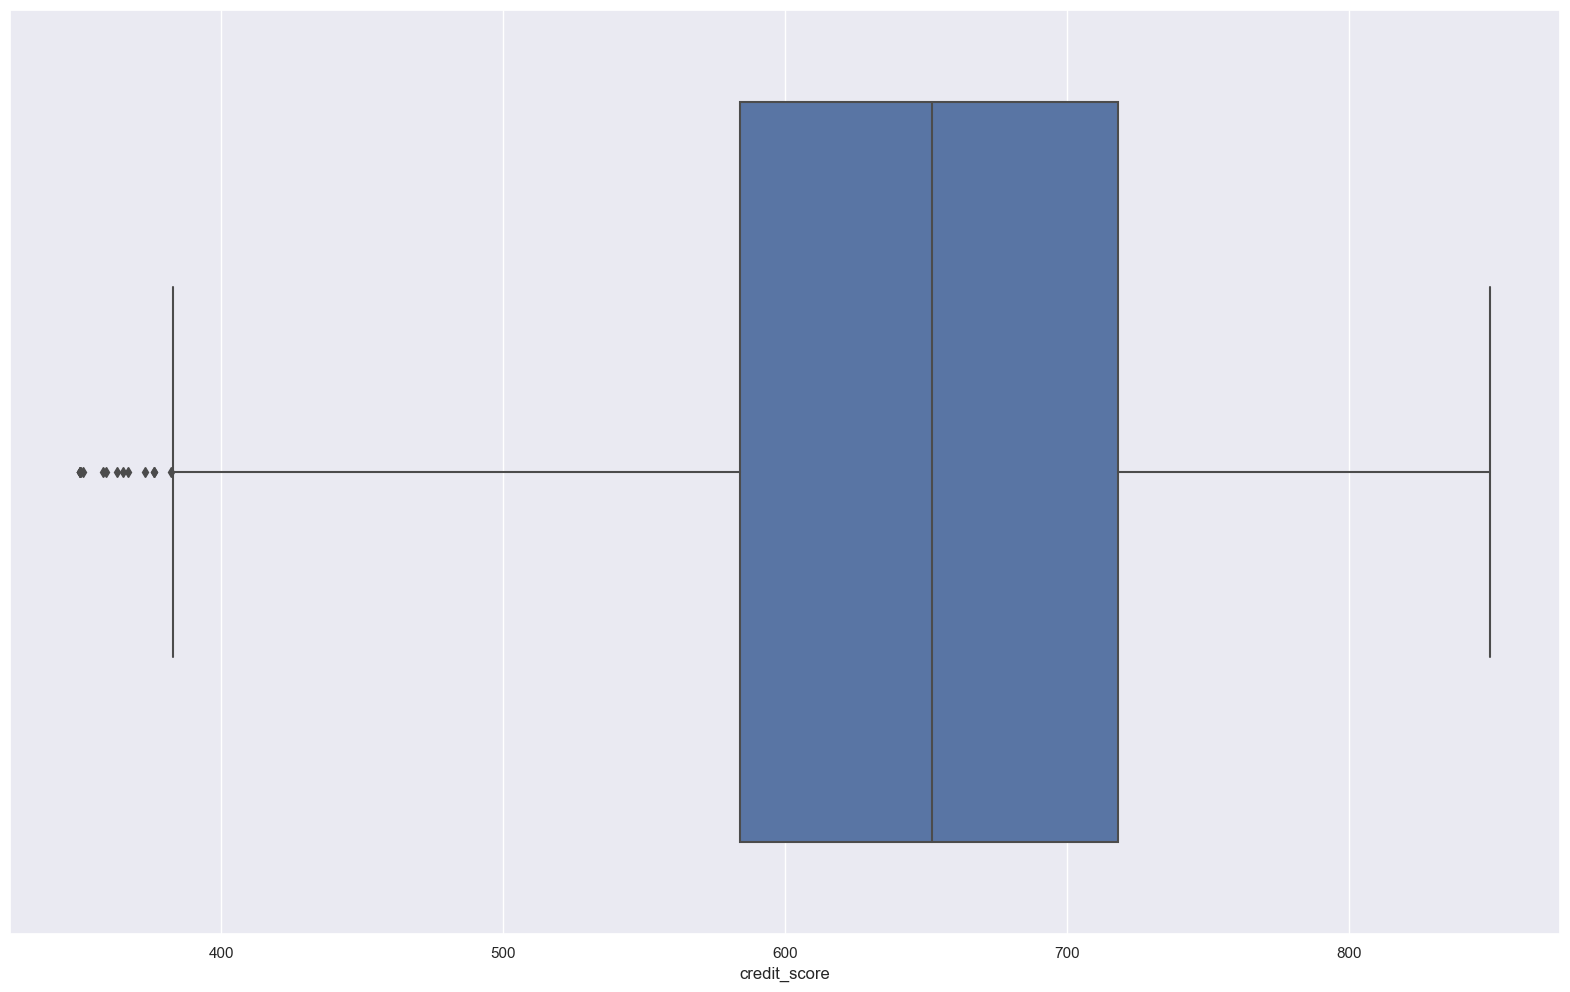

In [73]:
fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
sns.boxplot(data=df,x=df["credit_score"])

In [74]:
#Removing the outlier in the datacolumn credit_score
df = df[df["credit_score"]> Lower_range]

<Axes: xlabel='credit_score'>

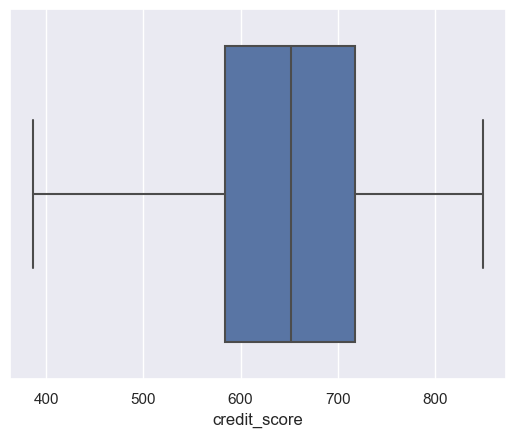

In [75]:
sns.boxplot(data=df,x=df["credit_score"])

In [76]:
df.shape

(9984, 15)

Detecting outlier for datacolumn age.

In [77]:
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR= Q3-Q1
Lower_range = Q1-1.5*IQR
Upper_range = Q3+1.5*IQR
print(IQR, Lower_range, Upper_range)

12.0 14.0 62.0


<Axes: xlabel='age'>

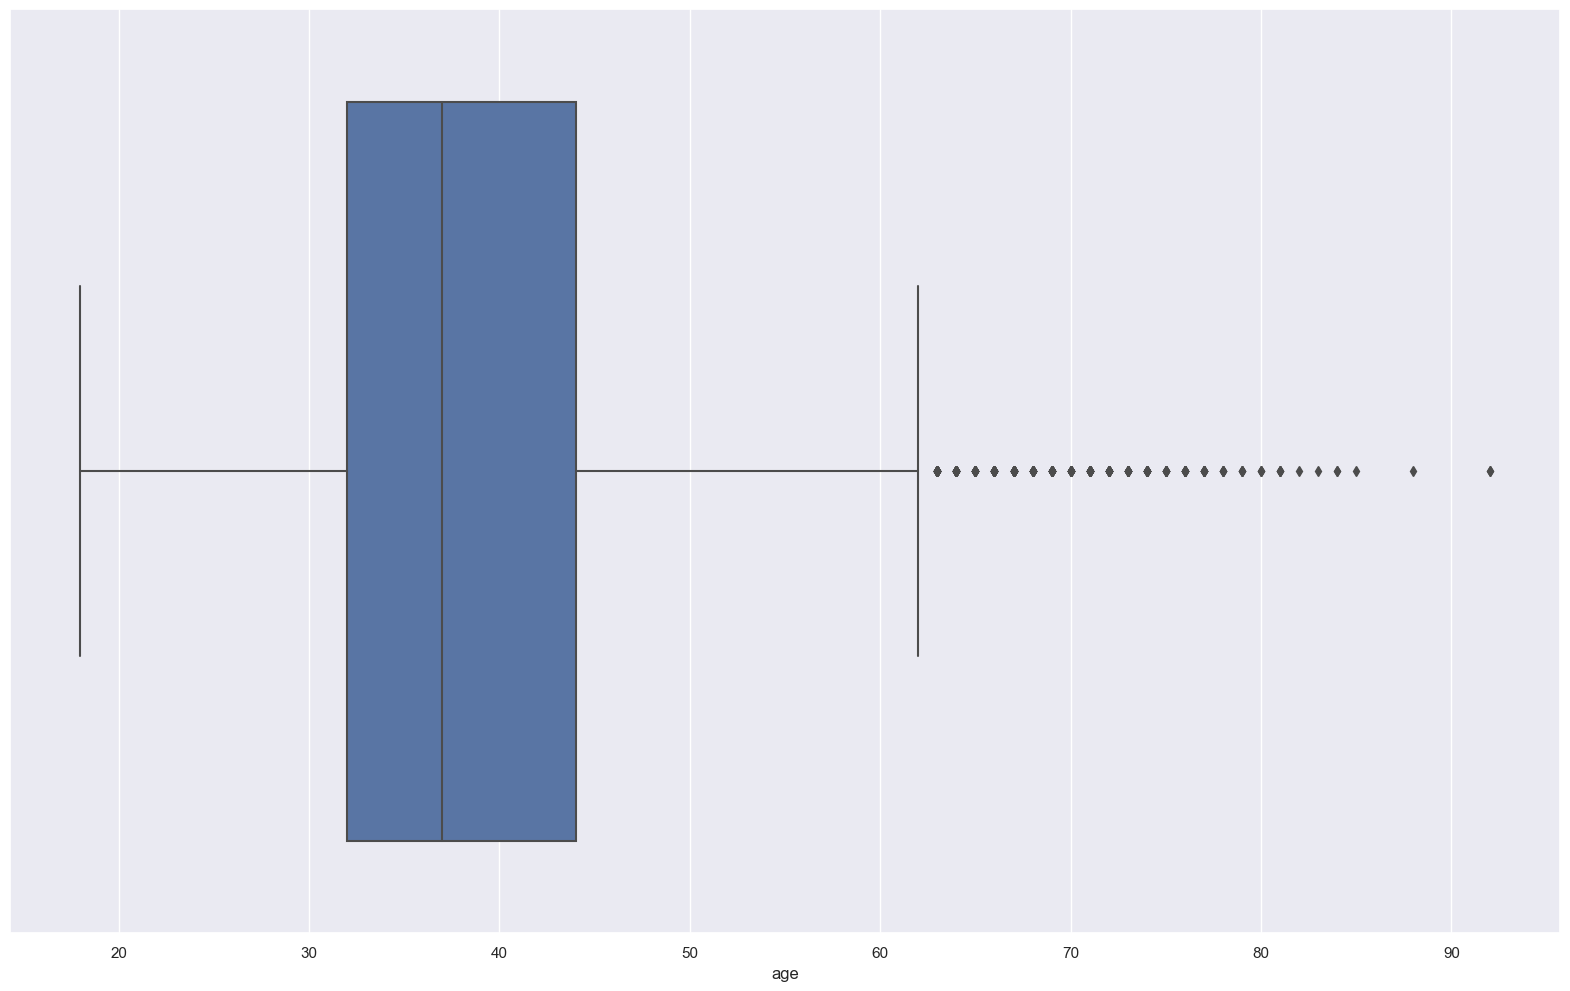

In [78]:
fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
sns.boxplot(data=df,x=df["age"])

#this shows that there are outliers present 

In [79]:
#Removing outliers
df = df[df["age"]< Upper_range]

<Axes: xlabel='age'>

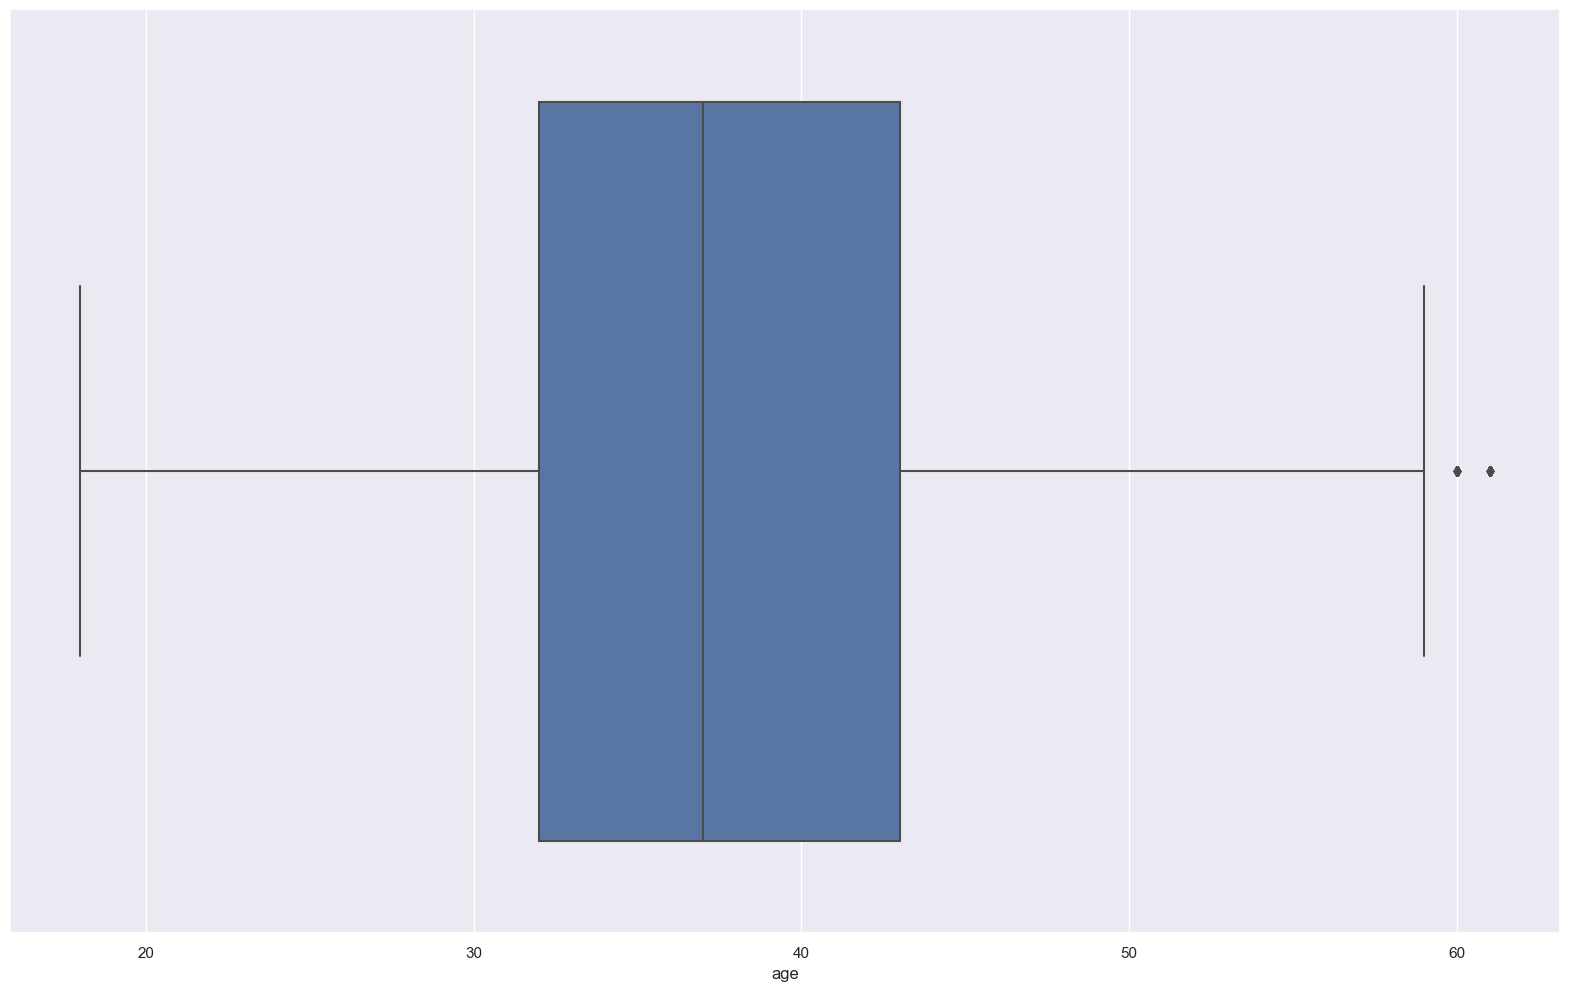

In [80]:
fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
sns.boxplot(data=df,x=df["age"])

In [81]:
df.shape

(9573, 15)

#  NORMALIZING DATA 

There are two widely used normalizing techniques:

1. Standardization Scaling:
Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

2. Min-Max Scaling(Normalizing):
This technique re-scales a feature or observation value with distribution value between 0 and 1.

When to use Standardization and Normalization:

When you don’t know the distribution of your data or when you know it’s not Gaussian, normalization is a smart approach to apply.

When your data has variable dimensions and the technique you’re using (like logistic regression,  linear regression, linear discriminant analysis) standardization is useful.

In [107]:
#Category Codes Approach

#convert a column to a category, then use those category values for your label encoding

df["country"] = df["country"].astype('category')
df.dtypes

customer_id            int64
credit_score           int64
country             category
gender                object
age                    int64
tenure                 int64
balance              float64
products_number        int64
credit_card            int64
active_member          int64
estimated_salary     float64
churn                  int64
dtype: object

In [108]:
#Then assign the encoded variable to a new column using the cat.codes accessor:

df["country"] =df["country"].cat.codes
df.head()

customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619        0  Female   42       2       0.00   
1     15647311           608        2  Female   41       1   83807.86   
2     15619304           502        0  Female   42       8  159660.80   
3     15701354           699        0  Female   39       1       0.00   
4     15737888           850        2  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [109]:
#for gender column

df["gender"] = df["gender"].astype('category')
df.dtypes

customer_id            int64
credit_score           int64
country                 int8
gender              category
age                    int64
tenure                 int64
balance              float64
products_number        int64
credit_card            int64
active_member          int64
estimated_salary     float64
churn                  int64
dtype: object

In [110]:
df["gender"] =df["gender"].cat.codes
df.head()

customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619        0       0   42       2       0.00   
1     15647311           608        2       0   41       1   83807.86   
2     15619304           502        0       0   42       8  159660.80   
3     15701354           699        0       0   39       1       0.00   
4     15737888           850        2       0   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [90]:
list_cat = ['country', 'gender']
df = pd.get_dummies(df, columns = list_cat, prefix = list_cat)

In [91]:
df.head()

customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  country_0  country_1  \
0            1              1         101348.88      1       True      False   
1            0              1         112542.58      0      False      False   
2            1              0         113931.57      1       True      False   
3            0              0          93826.63      0       True      False   
4            1              1          79084.10      0      False      False   

   country_2  gender_0  gender_1  
0      False      True     False  
1       True      True     False  
2      False      True     False  
3      False      True     False  
4       True      True     False

In [92]:
#Getting Numeric data
df_num = df.loc[:,df.dtypes!= object]
print(df_num)

      customer_id  credit_score  age  tenure    balance  products_number  \
0        15634602           619   42       2       0.00                1   
1        15647311           608   41       1   83807.86                1   
2        15619304           502   42       8  159660.80                3   
3        15701354           699   39       1       0.00                2   
4        15737888           850   43       2  125510.82                1   
...           ...           ...  ...     ...        ...              ...   
9995     15606229           771   39       5       0.00                2   
9996     15569892           516   35      10   57369.61                1   
9997     15584532           709   36       7       0.00                1   
9998     15682355           772   42       3   75075.31                2   
9999     15628319           792   28       4  130142.79                1   

      credit_card  active_member  estimated_salary  churn  country_0  \
0              

In [93]:
from sklearn.preprocessing import StandardScaler
# Create the standard Scaler object
scaler = StandardScaler()
scaler = scaler.fit(df_num)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_num)
print(standardized_data)

[[-0.78321342 -0.32622142  0.29351742 ... -0.57380915  1.09598752
  -1.09598752]
 [-0.60653412 -0.44003595  0.19816383 ...  1.74273971  1.09598752
  -1.09598752]
 [-0.99588476 -1.53679418  0.29351742 ... -0.57380915  1.09598752
  -1.09598752]
 ...
 [-1.47928179  0.60498839 -0.27860412 ... -0.57380915  1.09598752
  -1.09598752]
 [-0.11935577  1.25683526  0.29351742 ... -0.57380915 -0.91241915
   0.91241915]
 [-0.87055909  1.46377078 -1.04143285 ... -0.57380915  1.09598752
  -1.09598752]]


NORMALIZING DATA USING MIN MAX

In [95]:
#Getting Numeric data
df_num = df.loc[:,df.dtypes!=object]

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
print(normalized_data)

[[0.27561613 0.538      0.32432432 ... 0.         1.         0.        ]
 [0.32645436 0.516      0.31081081 ... 1.         1.         0.        ]
 [0.21442143 0.304      0.32432432 ... 0.         1.         0.        ]
 ...
 [0.07532731 0.718      0.24324324 ... 0.         1.         0.        ]
 [0.46663653 0.844      0.32432432 ... 0.         0.         1.        ]
 [0.25048302 0.884      0.13513514 ... 0.         1.         0.        ]]


Text(0.5, 1.0, 'Original data')

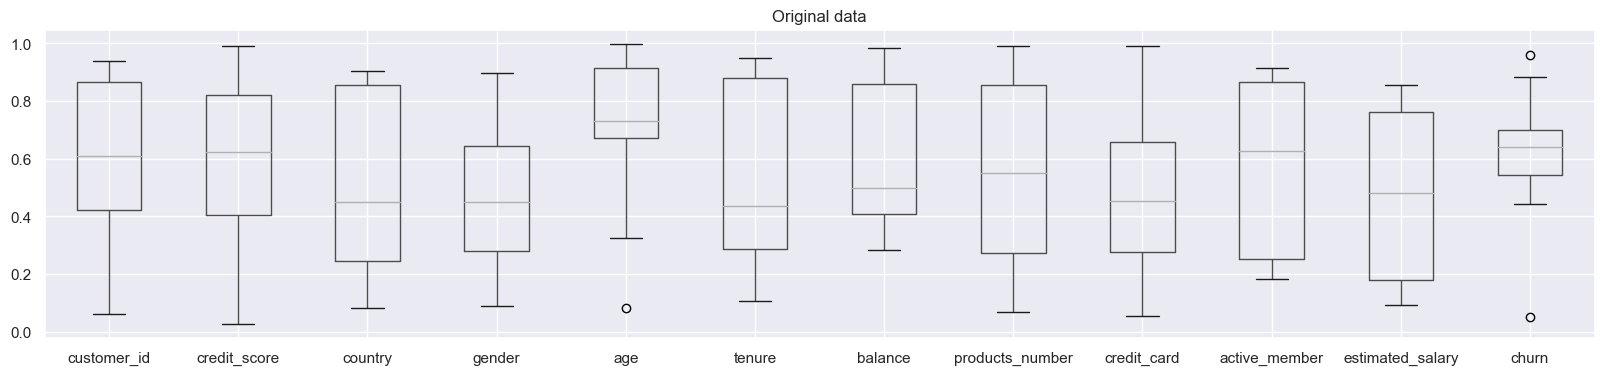

In [97]:
plt.figure(figsize=(20,4))
df = pd.DataFrame(data = np.random.random(size=(12,12)), columns = ['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member','estimated_salary', 'churn'])
df.boxplot()
plt.title('Original data')

Text(0.5, 1.0, 'standardized_data')

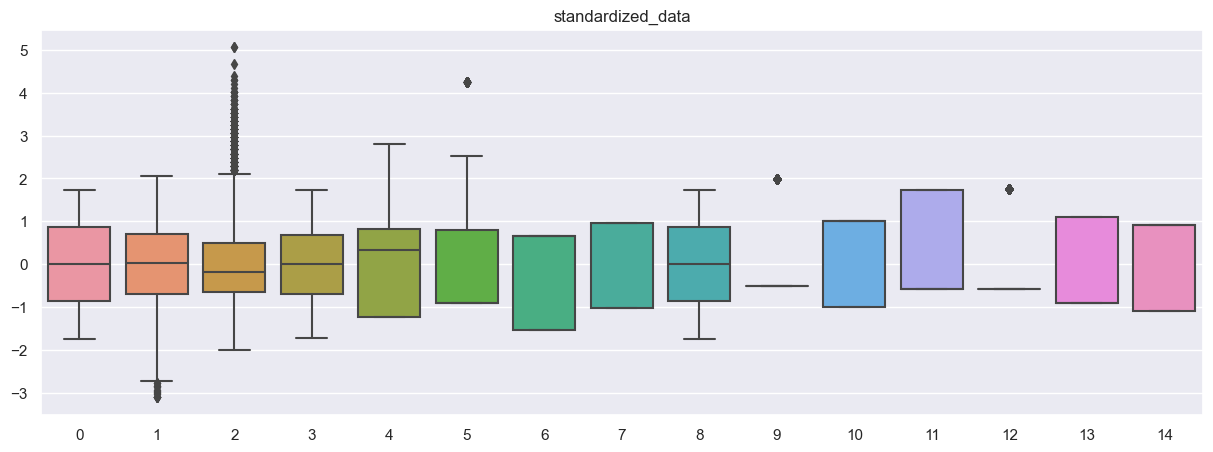

In [98]:
plt.figure(figsize=(15,5))
sns.boxplot(data= standardized_data)
plt.title("standardized_data")

Text(0.5, 1.0, 'normalized_data')

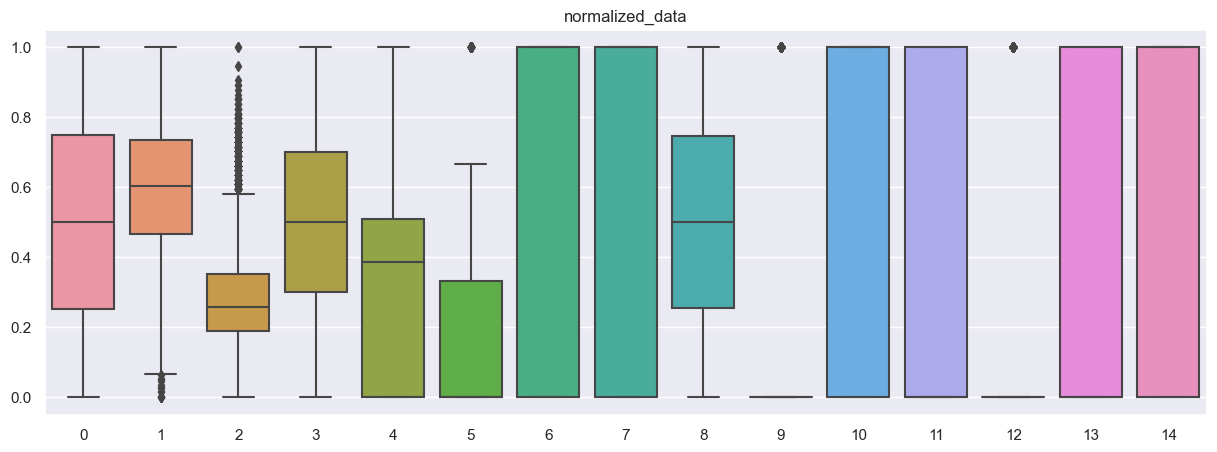

In [99]:
plt.figure(figsize=(15,5))
sns.boxplot(data= normalized_data)
plt.title("normalized_data")

Splitting the Dataset into the Independent Feature Matrix

We split the data because we want numeric array as an input for RF( random Forest Classifier)

In [100]:
#df.loc[start:stop:step]
#loc[] is used to select rows and columns by Names/Labels
#iloc[] is used to select rows and columns by Integer Index/Position. zero based index position.
#START is the name of the row/column label
#STOP is the name of the last row/column label to take, and 
#STEP as the number of indices to advance after each extraction
X = df.iloc[:, :-1].values
print(X)

[[0.86258046 0.30542967 0.31507191 0.46759002 0.08167826 0.30792921
  0.32410238 0.06699731 0.99109977 0.56741839 0.47210766]
 [0.90409349 0.99096401 0.86512393 0.11256597 0.6942247  0.37238858
  0.43966074 0.98934581 0.30492346 0.86325685 0.81106309]
 [0.06957235 0.78511596 0.25503576 0.87113032 0.90914633 0.22455544
  0.28402958 0.16410323 0.05292142 0.90360836 0.11591982]
 [0.8220233  0.27253086 0.9030859  0.898064   0.81170372 0.63444719
  0.87536042 0.3831912  0.17821982 0.18834161 0.78173364]
 [0.93725538 0.02731434 0.85198556 0.23670804 0.32372705 0.92994615
  0.41981496 0.87064574 0.44716228 0.76133011 0.09311379]
 [0.67168866 0.9180339  0.32364466 0.08894106 0.95011581 0.42850765
  0.95882493 0.31005705 0.80297657 0.5937032  0.09544476]
 [0.06010871 0.96504721 0.19178042 0.54086264 0.72274181 0.10730343
  0.36546255 0.71523301 0.60940254 0.91400862 0.34963095]
 [0.54630289 0.61254031 0.88568574 0.60465593 0.67654385 0.87121616
  0.53327816 0.87956972 0.59409121 0.65687747 0.19

Extracting the Dataset to Get the Dependent Vector

In [101]:
#df.iloc[start:stop:step]
#iloc[] is used to select rows and columns by Integer Index/Position. zero based index position.
#START is the integer index of the row/column.
#STOP is the integer index of the last row/column where you wanted to stop the selection, and 
#STEP as the number of indices to advance after each extraction.

Y = df.iloc[:, -1].values
print(Y)

[0.62266386 0.68715931 0.50733075 0.88338589 0.73338165 0.96060265
 0.44232912 0.65926871 0.05093725 0.55510492 0.61794761 0.66450334]


# Random Forest Classifier

RF classifier builds a decision trees on different samples and gives majority votes on classification and averge votes in case of regression. In other words, RF classifier is used to know which are the important features we use random forest classifier.

PREREQUISITIES FOR RANDOM FOREST CLASSIFIER TO PERFORM WELL:
1. If there is some actual signal in our features then it would do better than random guessing

2. Prediction made by an individual tree should have low correlation between each other.

In [102]:
# Import the Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

 # We perform training on the Random Forest model and generate the importance of the features:
 
 Therefore, when training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

In [111]:
X = df.drop('churn', axis=1)
y = df.churn
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) customer_id                    0.223540
 2) credit_score                   0.127632
 3) country                        0.119565
 4) gender                         0.119544
 5) age                            0.118382
 6) tenure                         0.118093
 7) balance                        0.067734
 8) products_number                0.039512
 9) credit_card                    0.033444
10) active_member                  0.016308
11) estimated_salary               0.016245


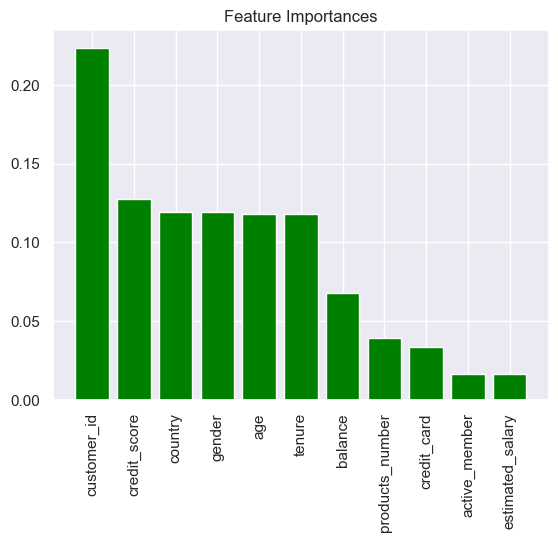

In [112]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()


The graph above shows the features with the highest importance value to the lowest importance value. 

It shows the most important features are creditscore, age, tenure, balance, and so on.


# MODEL SELECTION: 

Our dataset problem is a classification problem, therefore we use following models:

K-Nearest Neighbor (KNN)

Logistic Regression (LR)

AdaBoost

Gradient Boosting (GB)

RandomForest (RF)


In [113]:
# Import different models 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
# Scoring function
from sklearn.metrics import roc_auc_score, roc_curve

In [114]:
X = df.drop('churn', axis=1)
y = df.churn

#The reason behind dropping churn attribute is that this attribute contains the answer/target/label for each row
#Machine algorithms need input in terms of a key-value pair, so a target column is key and all other columns are values.

In [115]:
# Splitting the dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Splitting dataset which consists of 70% of training set and test set of 30%

(7000, 11) (3000, 11) (7000,) (3000,)


# K NEAREST NEIGHBORS ALGORITHM:

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. It is a lazy learning and non-parametric algorithm. KNN involves classifying a data point by looking at the nearest annotated data point, also known as the nearest neighbor.

In [116]:
# Initialization of the KNN

#The Minkowski metric, also called the Minkowski tensor or pseudo-Riemannian metric, 
#is a tensor whose elements are defined by the matrix. (1) where the convention is used, 
#and the indices run over 0, 1, 2, and 3, with the time coordinate and. the space coordinates.

knMod = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p = 2,
                             metric = 'minkowski', metric_params = None)
# Fitting the model with training data 
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
from sklearn.metrics import classification_report
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knMod.fit(X_train, y_train)

pk = knMod.predict(X_test)
pd.DataFrame(classification_report(y_test, pk,output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.812635    0.200935     0.769     0.506785      0.697431
recall        0.929774    0.076106     0.769     0.502940      0.769000
f1-score      0.867267    0.110398     0.769     0.488832      0.724723
support    2435.000000  565.000000     0.769  3000.000000   3000.000000

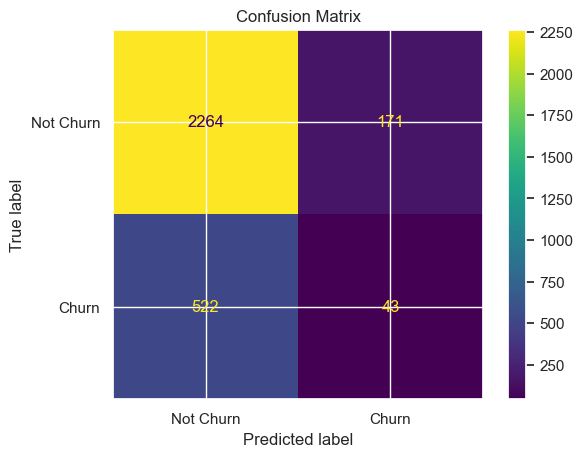

In [118]:
plot_confusion_matrix(knMod, X_test, y_test, display_labels=["Not Churn", "Churn"])
plt.title("Confusion Matrix")
plt.show()

# Logistic Regression:

Logistic regression is a supervised learning algorithm used to predict a dependent categorical target variable.

There are basically three types of logistic regression: 
1. Binary Logistic Regression

2. Multinomial Logistic Regression

3. Ordinal Logistic Regression

Our dataset uses Binary Logistic Regression


LOGISTIC REGRESSION ASSUMPTIONS:

a.Remove highly correlated inputs.

b. Consider removing outliers in your training set because logistic regression will not give significant weight to them during its calculations.

c. Does not favor sparse (consisting of a lot of zero values) data.

d. Logistic regression is a classification model, unlike linear regression.

In [119]:
# Initialization of the Logistic Regression
lrMod = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 1.0, fit_intercept = True,
                            intercept_scaling = 1, class_weight = None, 
                            random_state = None, solver = 'liblinear', max_iter = 100,
                            multi_class = 'ovr', verbose = 2)
# Fitting the model with training data 
lrMod.fit(X_train, y_train)

[LibLinear]iter  1 act 1.236e+03 pre 1.175e+03 delta 7.786e-08 f 4.852e+03 |g| 3.182e+10 CG   1
iter  2 act 1.618e+01 pre 1.574e+01 delta 7.786e-08 f 3.616e+03 |g| 3.141e+09 CG   1
cg reaches trust region boundary
iter  3 act 1.619e+00 pre 1.619e+00 delta 3.114e-07 f 3.600e+03 |g| 1.314e+08 CG   2
cg reaches trust region boundary
iter  4 act 6.053e+00 pre 6.054e+00 delta 1.246e-06 f 3.599e+03 |g| 2.044e+07 CG   2
cg reaches trust region boundary
iter  5 act 2.002e+01 pre 2.000e+01 delta 4.169e-06 f 3.593e+03 |g| 1.393e+08 CG   2
iter  6 act 1.999e+01 pre 1.975e+01 delta 4.169e-06 f 3.573e+03 |g| 3.313e+07 CG   2
iter  7 act 5.626e-02 pre 5.615e-02 delta 4.169e-06 f 3.553e+03 |g| 1.786e+08 CG   1


LogisticRegression(multi_class='ovr', solver='liblinear', verbose=2)

In [120]:
from sklearn.metrics import classification_report
lrMod.fit(X_train, y_train)

pk = lrMod.predict(X_test)
pd.DataFrame(classification_report(y_test, pk,output_dict=True))

[LibLinear]iter  1 act 1.236e+03 pre 1.175e+03 delta 7.786e-08 f 4.852e+03 |g| 3.182e+10 CG   1
iter  2 act 1.618e+01 pre 1.574e+01 delta 7.786e-08 f 3.616e+03 |g| 3.141e+09 CG   1
cg reaches trust region boundary
iter  3 act 1.619e+00 pre 1.619e+00 delta 3.114e-07 f 3.600e+03 |g| 1.314e+08 CG   2
cg reaches trust region boundary
iter  4 act 6.053e+00 pre 6.054e+00 delta 1.246e-06 f 3.599e+03 |g| 2.044e+07 CG   2
cg reaches trust region boundary
iter  5 act 2.002e+01 pre 2.000e+01 delta 4.169e-06 f 3.593e+03 |g| 1.393e+08 CG   2
iter  6 act 1.999e+01 pre 1.975e+01 delta 4.169e-06 f 3.573e+03 |g| 3.313e+07 CG   2
iter  7 act 5.626e-02 pre 5.615e-02 delta 4.169e-06 f 3.553e+03 |g| 1.786e+08 CG   1


0      1  accuracy    macro avg  weighted avg
precision     0.811667    0.0  0.811667     0.405833      0.658803
recall        1.000000    0.0  0.811667     0.500000      0.811667
f1-score      0.896044    0.0  0.811667     0.448022      0.727289
support    2435.000000  565.0  0.811667  3000.000000   3000.000000

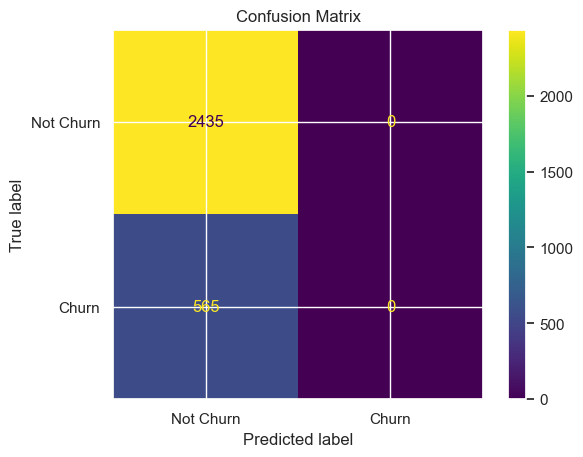

In [121]:
plot_confusion_matrix(lrMod, X_test, y_test, display_labels=["Not Churn", "Churn"])
plt.title("Confusion Matrix")
plt.show()

# BOOSTING:

Boosting is a special type of Ensemble Learning technique that works by combining several weak learners(predictors with poor accuracy) into a strong learner(a model with strong accuracy).

Two popular types of boosting methods: 
1. Adaptive Boosting
2. Gradient Boosting


# ADA BOOST aka ADAPTIVE BOOSTING ALGORITHM

It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances. Boosting is used to reduce bias as well as variance for supervised learning.

In [122]:
# Initialization of the AdaBoost model
adaMod = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0)
# Fitting the model with training data 
adaMod.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [123]:
from sklearn.metrics import classification_report
adaMod.fit(X_train, y_train)

pk = adaMod.predict(X_test)
pd.DataFrame(classification_report(y_test, pk,output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.893857    0.682243  0.863667     0.788050      0.854003
recall        0.944148    0.516814  0.863667     0.730481      0.863667
f1-score      0.918314    0.588117  0.863667     0.753216      0.856127
support    2435.000000  565.000000  0.863667  3000.000000   3000.000000

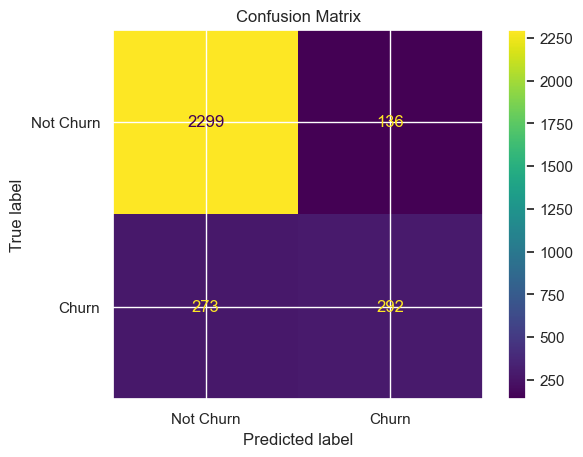

In [124]:
plot_confusion_matrix(adaMod, X_test, y_test, display_labels=["Not Churn", "Churn"])
plt.title("Confusion Matrix")
plt.show()


# GRADIENT BOOSTING CLASSIFIER:

In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. But the idea behind Gradient Boosting is that instead of fitting a predictor on the data at each iteration, it actually fits a new predictor to the residual errors made by the previous predictor.

In [125]:
# Initialization of the GradientBoosting model
gbMod = GradientBoostingClassifier(loss = 'deviance', n_estimators = 200)
# Fitting the model with training data 
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(loss='deviance', n_estimators=200)

In [126]:
from sklearn.metrics import classification_report
gbMod.fit(X_train, y_train)

pk = gbMod.predict(X_test)
pd.DataFrame(classification_report(y_test, pk,output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.892366    0.744737  0.873667     0.818552      0.864563
recall        0.960164    0.500885  0.873667     0.730525      0.873667
f1-score      0.925025    0.598942  0.873667     0.761983      0.863612
support    2435.000000  565.000000  0.873667  3000.000000   3000.000000

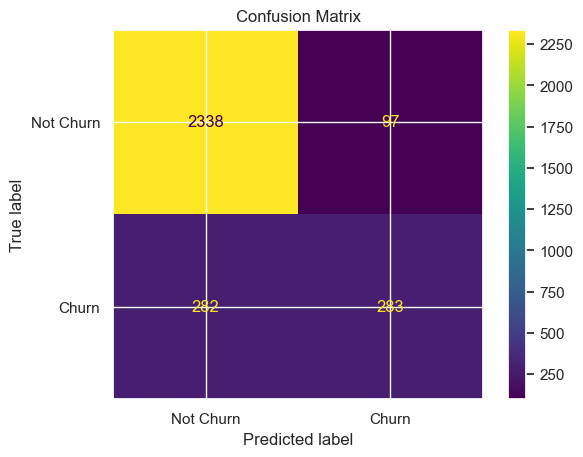

In [127]:
plot_confusion_matrix(gbMod, X_test, y_test, display_labels=["Not Churn", "Churn"])
plt.title("Confusion Matrix")
plt.show()

# Random Forest Model

In [128]:
# Initialization of the Random Forest model
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini')
# Fitting the model with training data 
rfMod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [129]:
from sklearn.metrics import classification_report
rfMod.fit(X_train, y_train)

pk = rfMod.predict(X_test)
pd.DataFrame(classification_report(y_test, pk,output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.882441    0.762918  0.869333     0.822679      0.859931
recall        0.967967    0.444248  0.869333     0.706107      0.869333
f1-score      0.923228    0.561521  0.869333     0.742374      0.855106
support    2435.000000  565.000000  0.869333  3000.000000   3000.000000

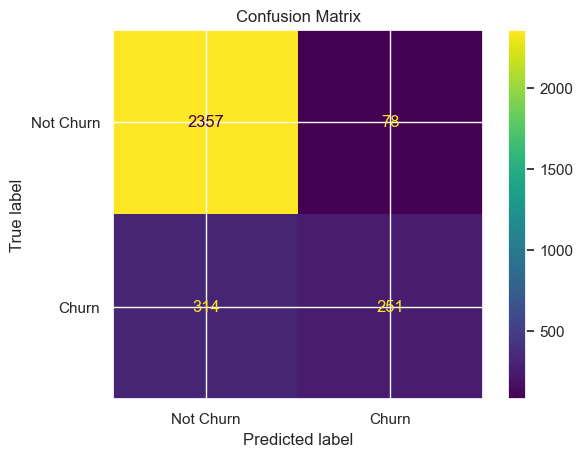

In [130]:
plot_confusion_matrix(rfMod, X_test, y_test, display_labels=["Not Churn", "Churn"])
plt.title("Confusion Matrix")
plt.show()

In [131]:
# Compute the model accuracy on the given test data and labels
knn_acc = knMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = knMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
knn_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)
print(knn_acc)
print(test_labels)
print(knn_roc_auc)

0.769
[0.4 0.  0.4 ... 0.4 0.  0.4]
0.5075502898366374


In [132]:
# Compute the model accuracy on the given test data and labels
lr_acc = lrMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = lrMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)
print(lr_acc)
print(test_labels)
print(lr_roc_auc)

0.8116666666666666
[0.25798705 0.15696753 0.22771838 ... 0.22656022 0.15950549 0.24466576]
0.5856553578891897


In [133]:
# Compute the model accuracy on the given test data and labels
ada_acc = adaMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = adaMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
ada_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')
print(ada_acc)
print(test_labels)
print(ada_roc_auc)

0.8636666666666667
[0.4982881  0.49458161 0.49730431 ... 0.49716861 0.50112529 0.49875987]
0.8439773945594301


In [134]:
# Compute the model accuracy on the given test data and labels
gb_acc = gbMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = gbMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
gb_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')
print(gb_acc)
print(test_labels)
print(gb_roc_auc)

0.8736666666666667
[0.1296648  0.01282891 0.14696299 ... 0.06399912 0.62088857 0.27302736]
0.8628009667278442


In [135]:
# Compute the model accuracy on the given test data and labels
rf_acc = rfMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = rfMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')
print(rf_acc)
print(test_labels)
print(rf_roc_auc)

0.8693333333333333
[0.2 0.  0.1 ... 0.1 0.5 0.5]
0.8142788610056151


# ROC-AUC

ROC: Receiver Operating Characteristics Curve
AUC: Area Under the Curve

ROC is a probability curve It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.

AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 

In [136]:
models = ['KNN', 'Logistic Regression', 'AdaBoost', 'GradientBoosting', 'Random Forest']
accuracy = [knn_acc, lr_acc, ada_acc, gb_acc, rf_acc]
roc_auc = [knn_roc_auc, lr_roc_auc, ada_roc_auc, gb_roc_auc, rf_roc_auc]

d = {'accuracy': accuracy, 'roc_auc': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

accuracy   roc_auc
KNN                  0.769000  0.507550
Logistic Regression  0.811667  0.585655
AdaBoost             0.863667  0.843977
GradientBoosting     0.873667  0.862801
Random Forest        0.869333  0.814279

In [137]:
#ROC

fpr_knn, tpr_knn, _ = roc_curve(y_test, knMod.predict_proba(np.array(X_test.values))[:,1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lrMod.predict_proba(np.array(X_test.values))[:,1])
fpr_ada, tpr_ada, _ = roc_curve(y_test, adaMod.predict_proba(np.array(X_test.values))[:,1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gbMod.predict_proba(np.array(X_test.values))[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rfMod.predict_proba(np.array(X_test.values))[:,1])

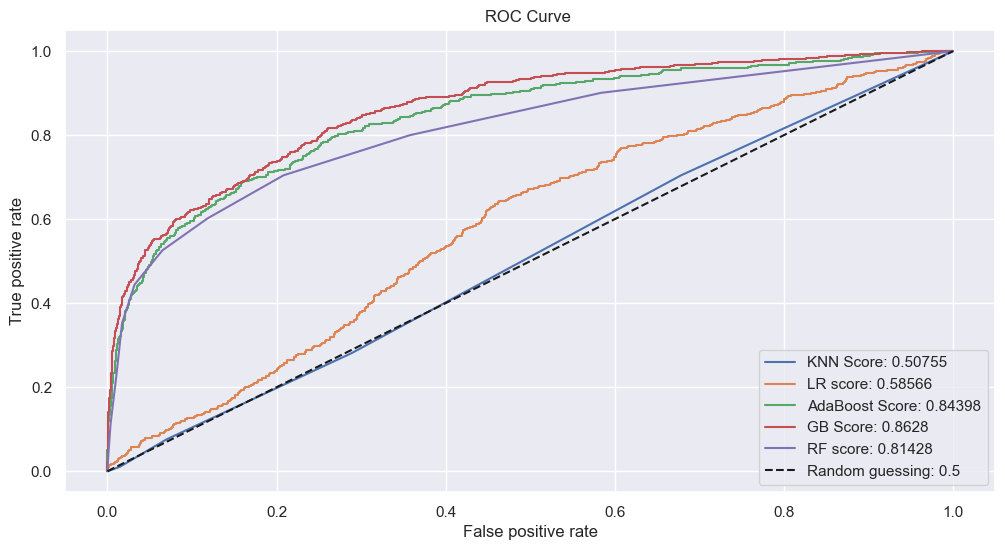

In [138]:
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(knn_roc_auc, 5)))
plt.plot(fpr_lr, tpr_lr, label = 'LR score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(ada_roc_auc, 5)))
plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(gb_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

#It is seen that Gradient boosting score and Ada Boost classifers gives good ROC 
# Other classifier (KNN, Logistic regress, Random forest did not perform well 

# CONFUSION MATRIX

It measures the quality of predictions from a classification model by looking athow many predictions are True and how many are False.

True Positive
The model predicted true and it is true.

The model predicted that someone is sick and the person is sick.

True Negative
The model predicted false and it is false.

The model predicted that someone is not sick and the person is not sick.

False Positive
The model predicted True and it is false.

The model predicted that someone is sick and the person is not sick.

False Negative
The model predicted false and it is true.

The model predicted that someone is not sick and the person is sick.

In [139]:
# Initialization of the Logistic Regression
lrMod = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 1.0, fit_intercept = True,
                            intercept_scaling = 1, class_weight = None, 
                            random_state = None, solver = 'liblinear', max_iter = 100,
                            multi_class = 'ovr', verbose = 2)
# Fitting the model with training data 
lrMod.fit(X_train, y_train)

[LibLinear]iter  1 act 1.236e+03 pre 1.175e+03 delta 7.786e-08 f 4.852e+03 |g| 3.182e+10 CG   1
iter  2 act 1.618e+01 pre 1.574e+01 delta 7.786e-08 f 3.616e+03 |g| 3.141e+09 CG   1
cg reaches trust region boundary
iter  3 act 1.619e+00 pre 1.619e+00 delta 3.114e-07 f 3.600e+03 |g| 1.314e+08 CG   2
cg reaches trust region boundary
iter  4 act 6.053e+00 pre 6.054e+00 delta 1.246e-06 f 3.599e+03 |g| 2.044e+07 CG   2
cg reaches trust region boundary
iter  5 act 2.002e+01 pre 2.000e+01 delta 4.169e-06 f 3.593e+03 |g| 1.393e+08 CG   2
iter  6 act 1.999e+01 pre 1.975e+01 delta 4.169e-06 f 3.573e+03 |g| 3.313e+07 CG   2
iter  7 act 5.626e-02 pre 5.615e-02 delta 4.169e-06 f 3.553e+03 |g| 1.786e+08 CG   1


LogisticRegression(multi_class='ovr', solver='liblinear', verbose=2)

In [140]:
y_pred= lrMod.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2435    0]
 [ 565    0]]


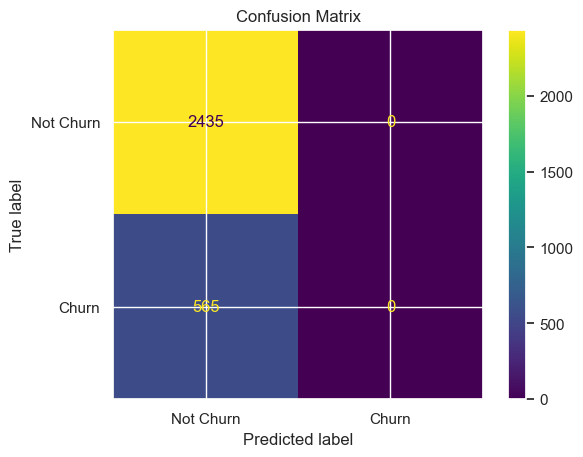

In [142]:
plot_confusion_matrix(lrMod, X_test, y_test, display_labels=["Not Churn", "Churn"])
plt.title("Confusion Matrix")
plt.show()

cm[0][0] = TP = 2435

cm[1][1] = TN = 565

cm[0][1] = FP = 0

cm[1][0] = FN = 0

# CROSS VALIDATION

Once we are done with training our model, we just can’t assume that it is going to work well on data that it has not seen before. In other words, we cant be sure that the model will have the desired accuracy and variance in production environment.

CROSS VALIDATION SCORE: Cross_val_score is used as a simple cross validation technique to prevent over-fitting and promote model generalisation.


### K-Fold Cross Validation

The cross-validation technique works by randomly shuffling the dataset and then splitting it into k groups. Thereafter, on iterating over each group, the group needs to be considered as a test set while all other groups are clubbed together into the training set. The model is tested on the test group and the process continues for k groups.

In [143]:
# To optimize the model (using K-Fold Cross-Validation)

# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5): #BY DEFAULT WE SET THE NUMBER OF FOLDS AS 5
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return(cvDict)

In [144]:
mod = [knMod, lrMod, adaMod, gbMod, rfMod]
cvD = cvDictGen(mod, scr = 'roc_auc')
cvD


#Based on the mean value and the standard deviation value, 
#we can conclude that our ROC-AUC score does not deviate much, so we are not suffering from the overfitting issue.

[LibLinear]iter  1 act 1.481e+03 pre 1.405e+03 delta 7.983e-08 f 5.545e+03 |g| 3.720e+10 CG   1
iter  2 act 2.130e+01 pre 2.068e+01 delta 7.983e-08 f 4.064e+03 |g| 3.821e+09 CG   1
cg reaches trust region boundary
iter  3 act 1.953e+00 pre 1.953e+00 delta 3.193e-07 f 4.043e+03 |g| 1.750e+08 CG   2
cg reaches trust region boundary
iter  4 act 7.243e+00 pre 7.244e+00 delta 1.277e-06 f 4.041e+03 |g| 2.383e+07 CG   2
cg reaches trust region boundary
iter  5 act 2.414e+01 pre 2.410e+01 delta 4.338e-06 f 4.034e+03 |g| 1.984e+08 CG   2
iter  6 act 2.486e+01 pre 2.453e+01 delta 4.338e-06 f 4.010e+03 |g| 4.040e+07 CG   2
iter  7 act 8.112e-02 pre 8.095e-02 delta 4.338e-06 f 3.985e+03 |g| 2.265e+08 CG   1
iter  8 act 1.836e-02 pre 1.834e-02 delta 4.338e-06 f 3.985e+03 |g| 8.359e+05 CG   2
[LibLinear]iter  1 act 1.481e+03 pre 1.406e+03 delta 7.983e-08 f 5.545e+03 |g| 3.721e+10 CG   1
[LibLinear]iter  2 act 2.131e+01 pre 2.069e+01 delta 7.983e-08 f 4.064e+03 |g| 3.822e+09 CG   1
cg reaches trust r

{'KNeighborsClassifier': [0.518874175992676, 0.010145364060990567],
 'LogisticRegression': [0.5789883558720421, 0.015295282145294409],
 'AdaBoostClassifier': [0.8444266003601738, 0.004240656594026397],
 'GradientBoostingClassifier': [0.8615343441168886, 0.004457465924189545],
 'RandomForestClassifier': [0.81462501375887, 0.007617411991515632]}

Based on the mean value and the standard deviation value, 
we can conclude that our ROC-AUC score does not deviate much, so we are not suffering from the overfitting issue.

# HYPERPARAMETER TUNING

In machine learning, we need to differentiate between parameters and hyperparameters. A learning algorithm learns or estimates model parameters for the given data set, then continues updating these values as it continues to learn. After learning is complete, these parameters become part of the model

Hyperparameters, on the other hand, are specific to the algorithm itself, so we can’t calculate their values from the data. We use hyperparameters to calculate the model parameters. Different hyperparameter values produce different model parameter values for a given data set.


When building a model, two important hyperparameters to consider are:

1. How many estimator (dicision trees) should you use.
2. What should be the maximum allowable depth for each decision tree.

In [145]:
# performing Hyperparameter tuning on Ada boost and gradient Boost score classifier as their performance is good
# Import methods
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [146]:
# First for Ada Boost
# Possible parameters
adaHyperParams = {'n_estimators': [10,50,100,200,420]}

In [147]:
gridSearchAda = RandomizedSearchCV(estimator = adaMod, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc')
gridSearchAda.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(n_estimators=200), n_iter=5,
                   param_distributions={'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [148]:
# Display the best parameters and the score
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 50}, 0.8409472369269337)

In [149]:
# For Gradient Boosting


# Possibles parameters
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [150]:
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = gbMod, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(loss='deviance',
                                                        n_estimators=200),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2aed24cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2aee11670>},
                   scoring='roc_auc')

In [151]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'deviance', 'max_depth': 5, 'n_estimators': 42}, 0.8566212956934578)

In [152]:
#Train models with help of new hyper parameter

# GradientBoosting with the optimal parameters
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)
print()

In [153]:
# AdaBoost with the optimal parameter
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [154]:
functions = [bestGbModFitted, bestAdaModFitted]
cvDictbestpara = cvDictGen(functions, scr = 'roc_auc')
cvDictbestpara

{'GradientBoostingClassifier': [0.862039629391797, 0.005327407597392287],
 'AdaBoostClassifier': [0.8465711309549379, 0.003978262578704872]}

In [155]:
# Getting the score GradientBoosting
test_labels = bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8616172702658502

In [156]:
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8485333720993622

# Explaining the model

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from eli5.sklearn import PermutationImportance
from sklearn.inspection import plot_partial_dependence



<Figure size 1000x600 with 0 Axes>

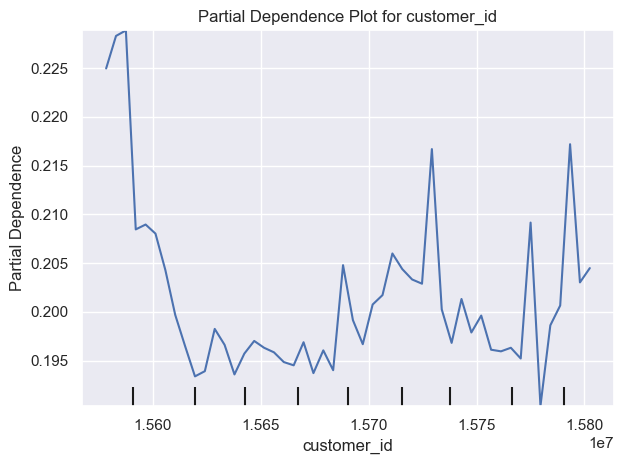

In [160]:
# Compute permutation importances
perm_importance = PermutationImportance(rfMod, random_state=0)
perm_importance.fit(X_test, y_test)

# Plot partial dependence using sklearn
plt.figure(figsize=(10, 6))
plot_partial_dependence(rfMod, X_test, features=[('customer_id',)], grid_resolution=50)
plt.xlabel('customer_id')
plt.ylabel('Partial Dependence')
plt.title('Partial Dependence Plot for customer_id')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

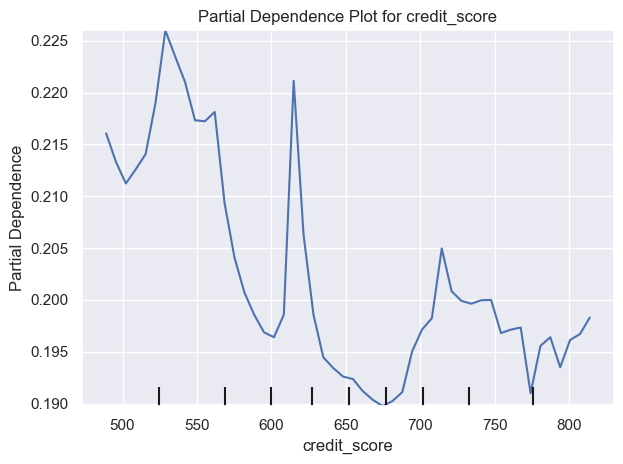

In [161]:
# Compute permutation importances
perm_importance = PermutationImportance(rfMod, random_state=0)
perm_importance.fit(X_test, y_test)

# Plot partial dependence using sklearn
plt.figure(figsize=(10, 6))
plot_partial_dependence(rfMod, X_test, features=[('credit_score',)], grid_resolution=50)
plt.xlabel('credit_score')
plt.ylabel('Partial Dependence')
plt.title('Partial Dependence Plot for credit_score')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

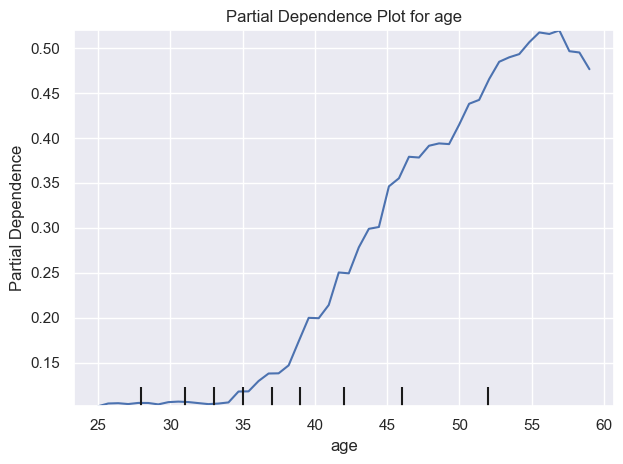

In [162]:

# Compute permutation importances
perm_importance = PermutationImportance(rfMod, random_state=0)
perm_importance.fit(X_test, y_test)

# Plot partial dependence using sklearn
plt.figure(figsize=(10, 6))
plot_partial_dependence(rfMod, X_test, features=[('age',)], grid_resolution=50)
plt.xlabel('age')
plt.ylabel('Partial Dependence')
plt.title('Partial Dependence Plot for age')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

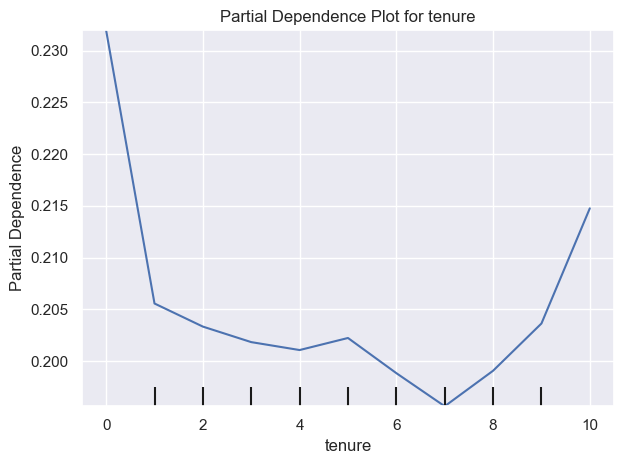

In [163]:
# Compute permutation importances
perm_importance = PermutationImportance(rfMod, random_state=0)
perm_importance.fit(X_test, y_test)

# Plot partial dependence using sklearn
plt.figure(figsize=(10, 6))
plot_partial_dependence(rfMod, X_test, features=[('tenure',)], grid_resolution=50)
plt.xlabel('tenure')
plt.ylabel('Partial Dependence')
plt.title('Partial Dependence Plot for tenure')
plt.tight_layout()
plt.show()

In [164]:
pip install --upgrade shap


Note: you may need to restart the kernel to use updated packages.


In [165]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [166]:
pip show shap


Name: shap
Version: 0.42.1
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: /opt/anaconda3/lib/python3.9/site-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [167]:
import shap 
shap.initjs()

import joblib

In [169]:
explainer = shap.TreeExplainer(rfMod)

shap_values = explainer.shap_values(np.array(X_test.iloc[0]))
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])

# Gauge Chart

In [170]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, fname=False): 
    
    N = len(labels)
    colors = colors[::-1]

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)


### 'LOW' probability means low likelihood of churn
 
 

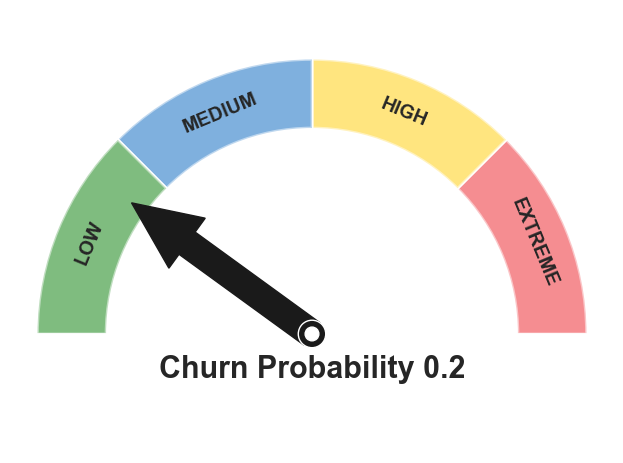

In [178]:
gauge(Probability=rfMod.predict_proba(X_test.iloc[0:1])[0,1])

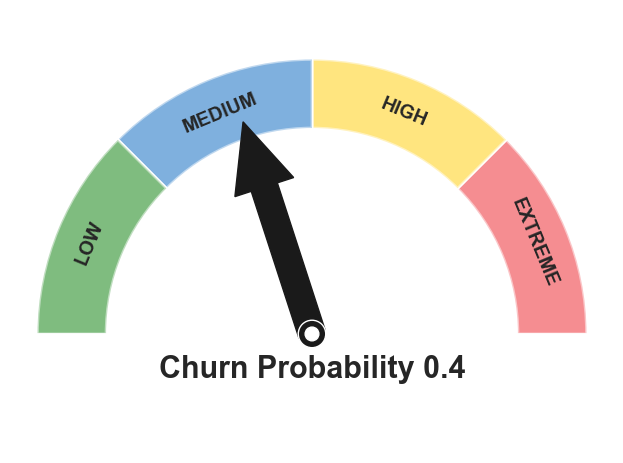

In [172]:
gauge(Probability=knMod.predict_proba(X_test.iloc[0:1])[0,1])

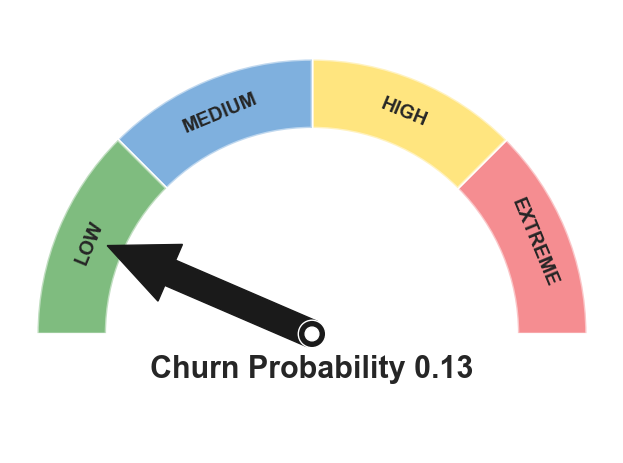

In [173]:
gauge(Probability=gbMod.predict_proba(X_test.iloc[0:1])[0,1])

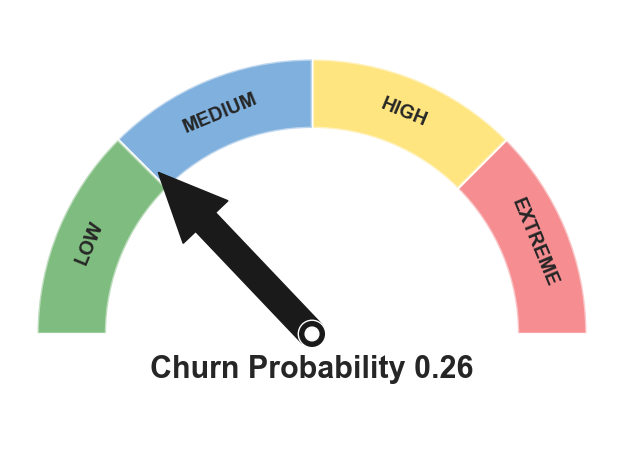

In [174]:
gauge(Probability=lrMod.predict_proba(X_test.iloc[0:1])[0,1])

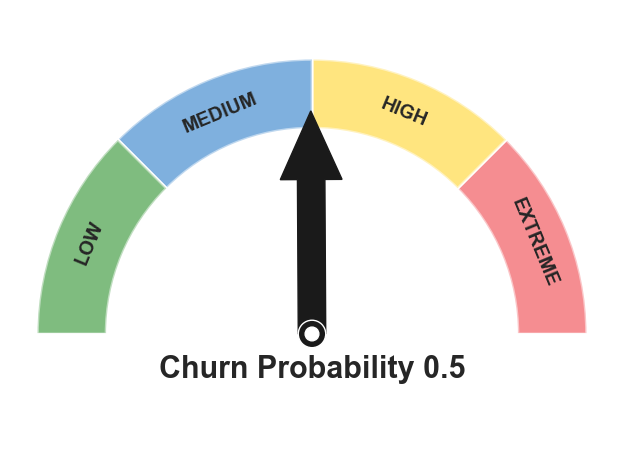

In [175]:
gauge(Probability=adaMod.predict_proba(X_test.iloc[0:1])[0,1])